In [ ]:
#pip install onnxruntime

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=FutureWarning)

In [ ]:
raw_data = pd.read_csv('student_data.csv')
raw_data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [ ]:
raw_data.describe(include='all')

school  sex         age address famsize Pstatus        Medu  \
count     395  395  395.000000     395     395     395  395.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      349  208         NaN     307     281     354         NaN   
mean      NaN  NaN   16.696203     NaN     NaN     NaN    2.749367   
std       NaN  NaN    1.276043     NaN     NaN     NaN    1.094735   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    3.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ...      famrel    freetime       goout  \
count   395.000000    395    395  ...  395.000000  395.000000  395.000000   
unique         NaN      5      5  ...         NaN         NaN         NaN   
top            NaN  other  other  ...         NaN         NaN         NaN   
freq           NaN    141    217  ...         NaN         NaN         NaN   
mean      2.521519    NaN    NaN  ...    3.944304    3.235443    3.108861   
std       1.088201    NaN    NaN  ...    0.896659    0.998862    1.113278   
min       0.000000    NaN    NaN  ...    1.000000    1.000000    1.000000   
25%       2.000000    NaN    NaN  ...    4.000000    3.000000    2.000000   
50%       2.000000    NaN    NaN  ...    4.000000    3.000000    3.000000   
75%       3.000000    NaN    NaN  ...    5.000000    4.000000    4.000000   
max       4.000000    NaN    NaN  ...    5.000000    5.000000    5.000000   

              Dalc        Walc      health    absences          G1  \
count   395.000000  395.000000  395.000000  395.000000  395.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      1.481013    2.291139    3.554430    5.708861   10.908861   
std       0.890741    1.287897    1.390303    8.003096    3.319195   
min       1.000000    1.000000    1.000000    0.000000    3.000000   
25%       1.000000    1.000000    3.000000    0.000000    8.000000   
50%       1.000000    2.000000    4.000000    4.000000   11.000000   
75%       2.000000    3.000000    5.000000    8.000000   13.000000   
max       5.000000    5.000000    5.000000   75.000000   19.000000   

                G2          G3  
count   395.000000  395.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean     10.713924   10.415190  
std       3.761505    4.581443  
min       0.000000    0.000000  
25%       9.000000    8.000000  
50%      11.000000   11.000000  
75%      13.000000   14.000000  
max      19.000000   20.000000  

[11 rows x 33 columns]

In [ ]:
raw_data = raw_data.drop('address',axis=1)
raw_data

school sex  age famsize Pstatus  Medu  Fedu      Mjob      Fjob  reason  \
0       GP   F   18     GT3       A     4     4   at_home   teacher  course   
1       GP   F   17     GT3       T     1     1   at_home     other  course   
2       GP   F   15     LE3       T     1     1   at_home     other   other   
3       GP   F   15     GT3       T     4     2    health  services    home   
4       GP   F   16     GT3       T     3     3     other     other    home   
..     ...  ..  ...     ...     ...   ...   ...       ...       ...     ...   
390     MS   M   20     LE3       A     2     2  services  services  course   
391     MS   M   17     LE3       T     3     1  services  services  course   
392     MS   M   21     GT3       T     1     1     other     other  course   
393     MS   M   18     LE3       T     3     2  services     other  course   
394     MS   M   19     LE3       T     1     1     other   at_home  course   

     ... famrel  freetime  goout  Dalc Walc health absences  G1  G2  G3  
0    ...      4         3      4     1    1      3        6   5   6   6  
1    ...      5         3      3     1    1      3        4   5   5   6  
2    ...      4         3      2     2    3      3       10   7   8  10  
3    ...      3         2      2     1    1      5        2  15  14  15  
4    ...      4         3      2     1    2      5        4   6  10  10  
..   ...    ...       ...    ...   ...  ...    ...      ...  ..  ..  ..  
390  ...      5         5      4     4    5      4       11   9   9   9  
391  ...      2         4      5     3    4      2        3  14  16  16  
392  ...      5         5      3     3    3      3        3  10   8   7  
393  ...      4         4      1     3    4      5        0  11  12  10  
394  ...      3         2      3     3    3      5        5   8   9   9  

[395 rows x 32 columns]

In [ ]:
raw_data = raw_data.drop('famsize',axis=1)
raw_data = raw_data.drop('Fedu',axis=1)

In [ ]:
numeric_columns = raw_data.select_dtypes(include='number')

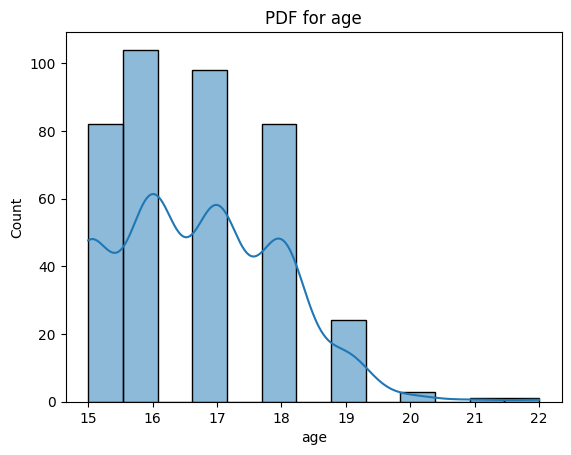

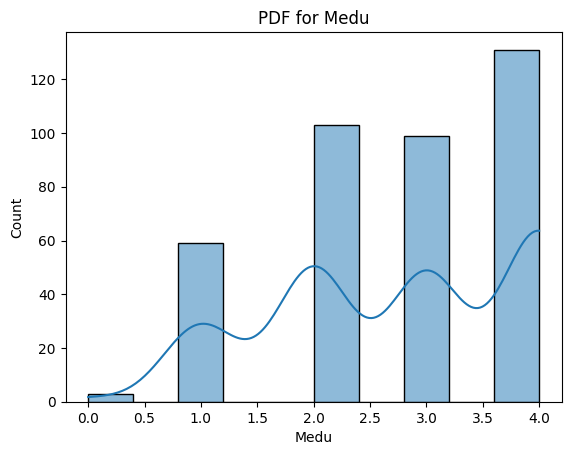

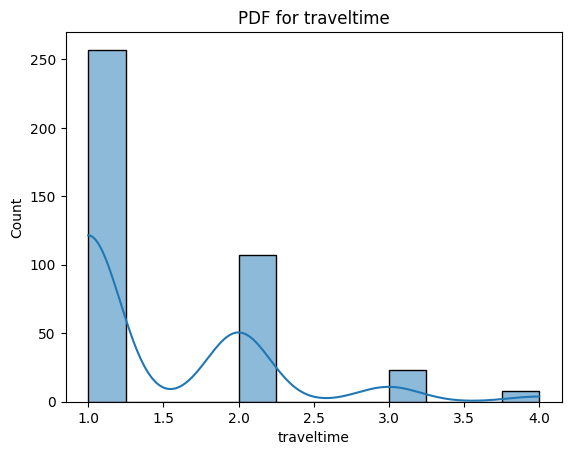

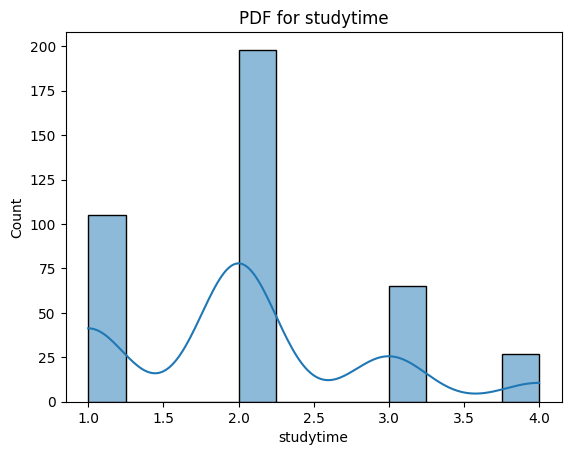

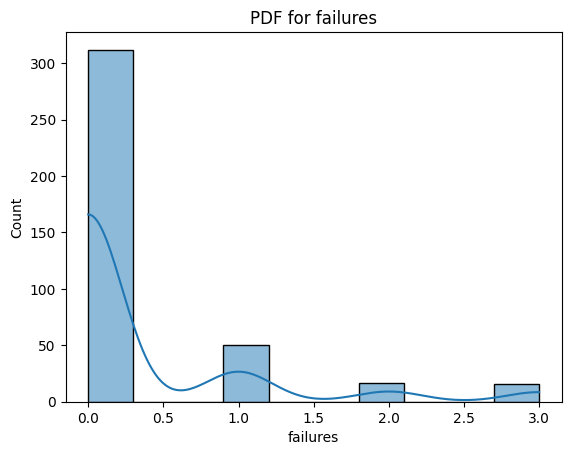

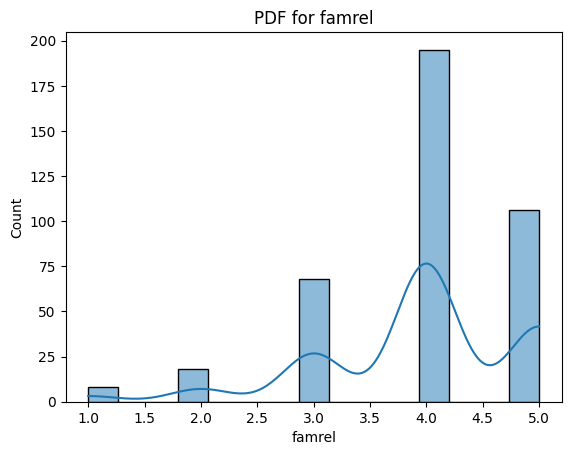

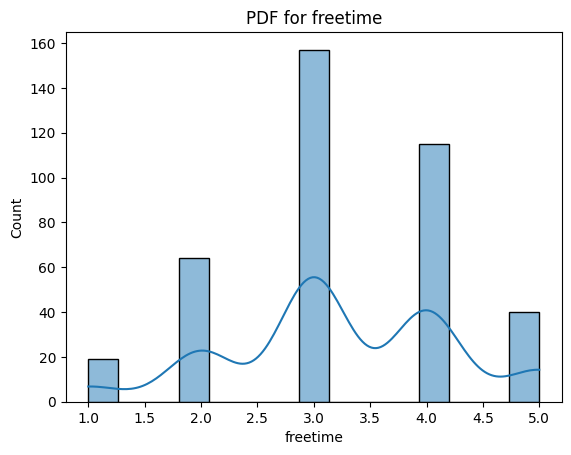

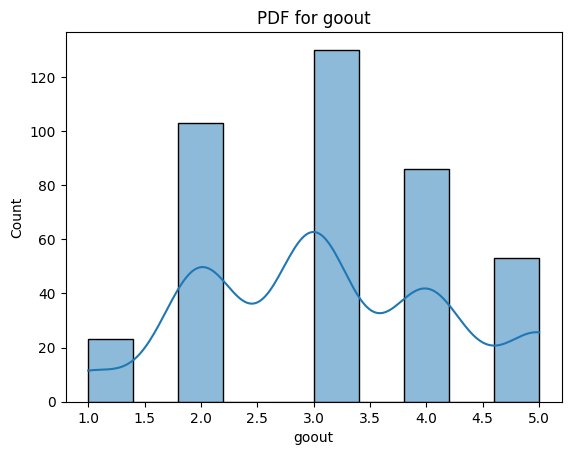

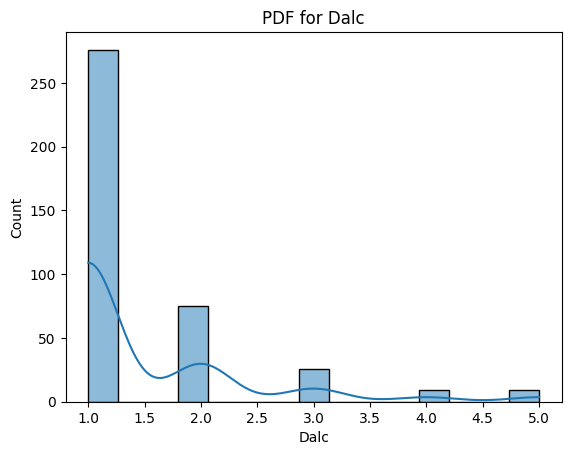

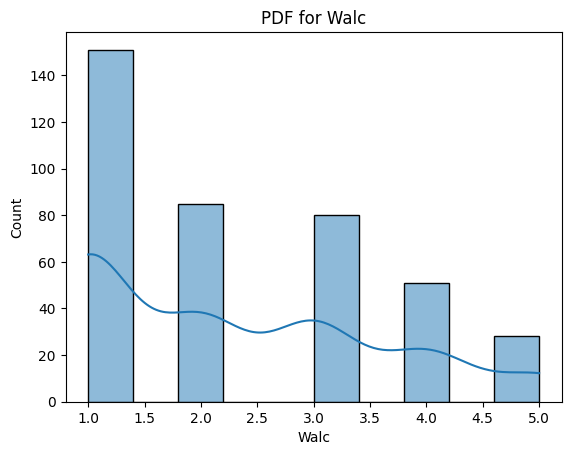

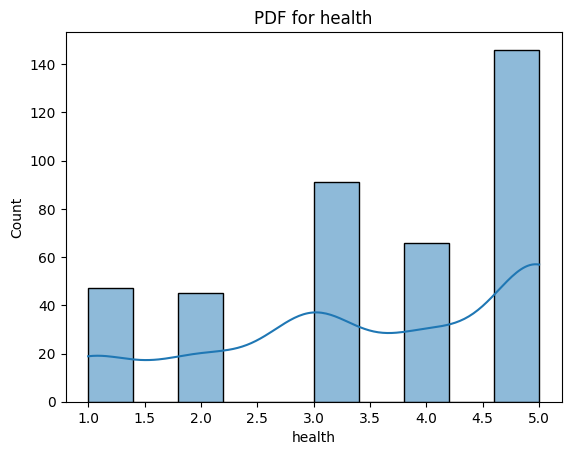

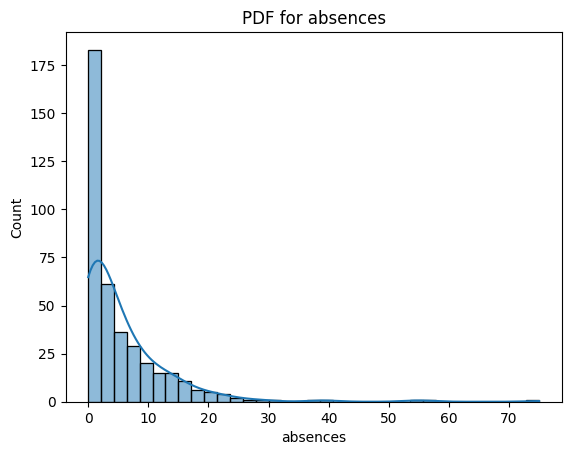

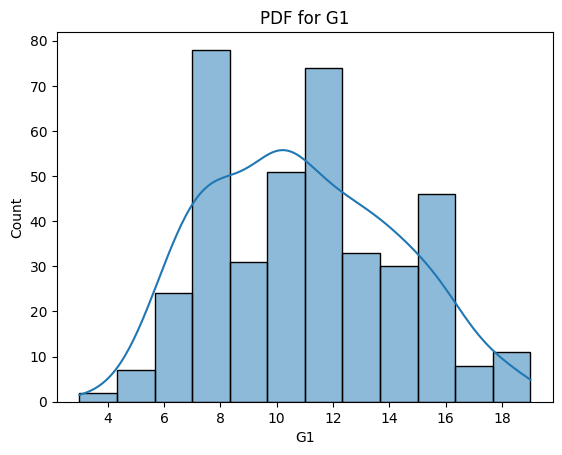

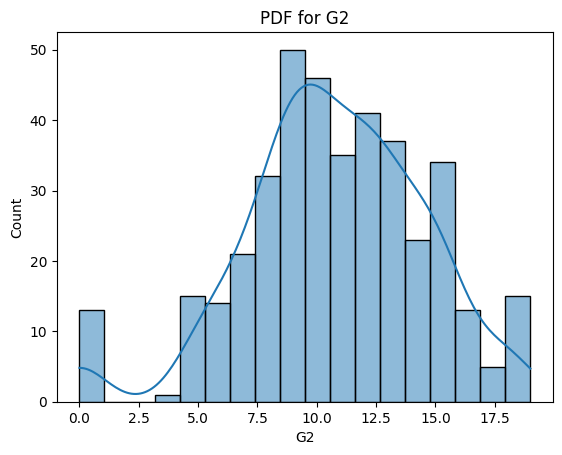

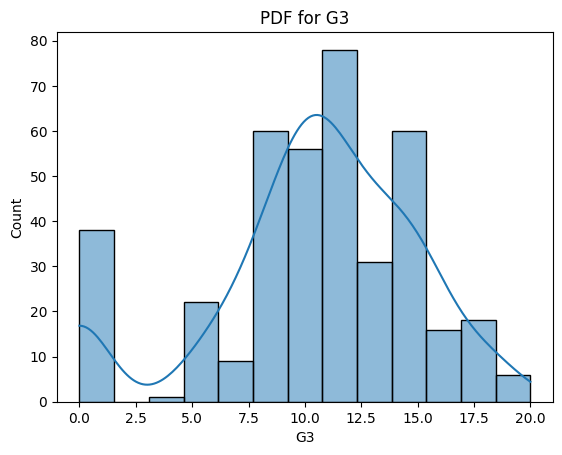

In [ ]:
# PDF
for column in numeric_columns.columns:
    sns.histplot(numeric_columns[column], kde=True)
    plt.title(f'PDF for {column}')
    plt.show()

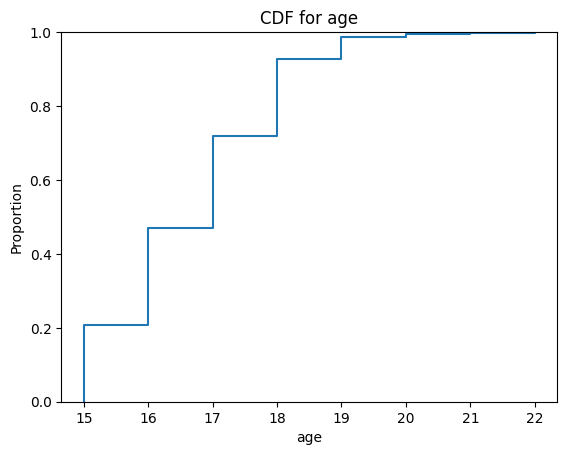

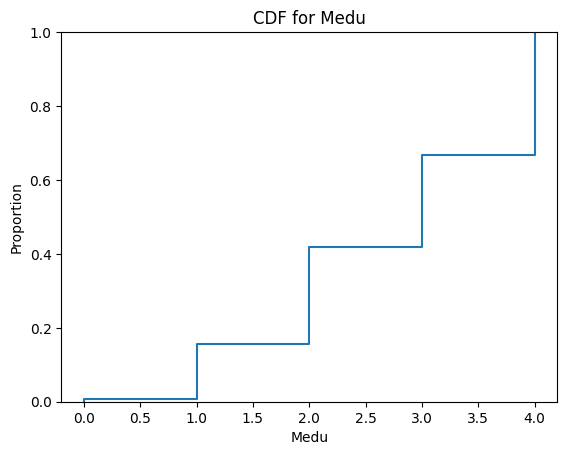

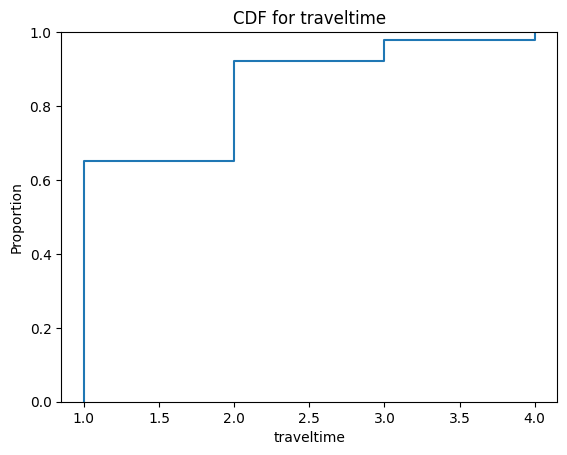

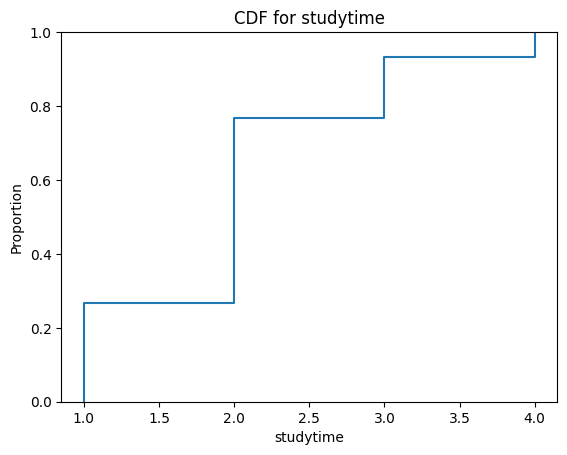

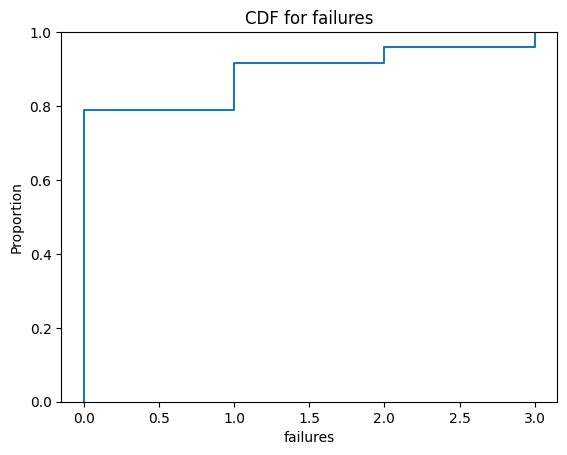

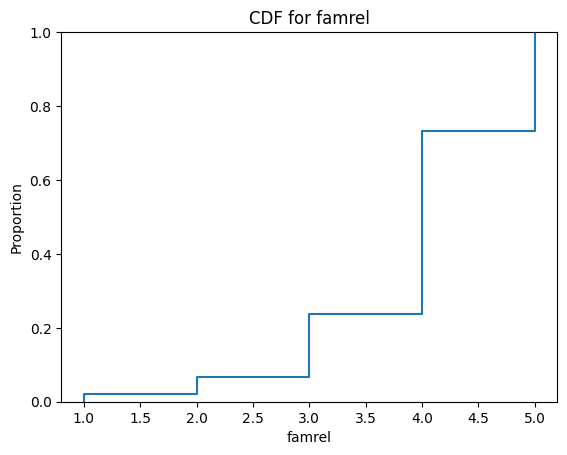

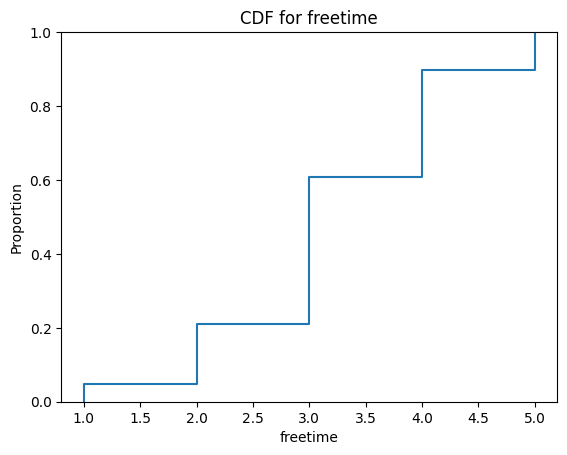

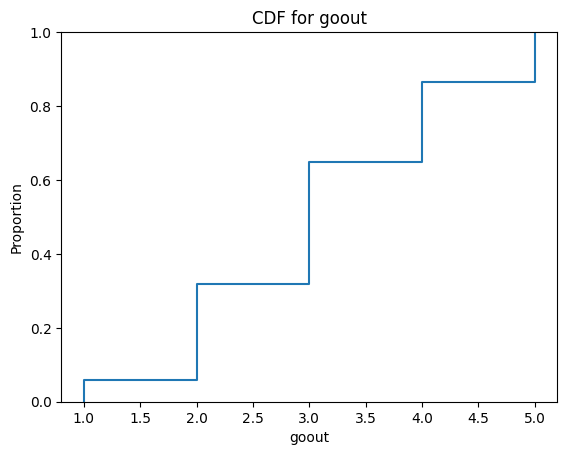

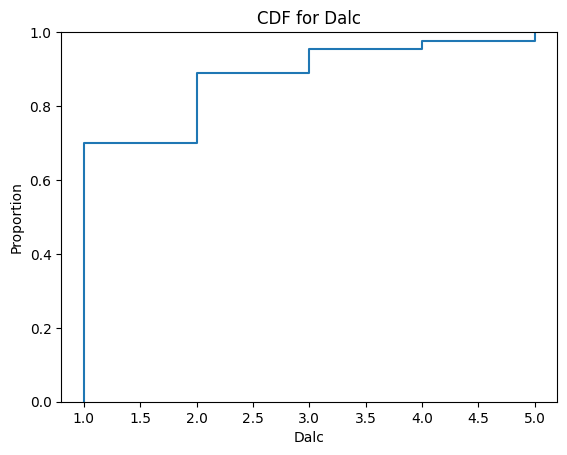

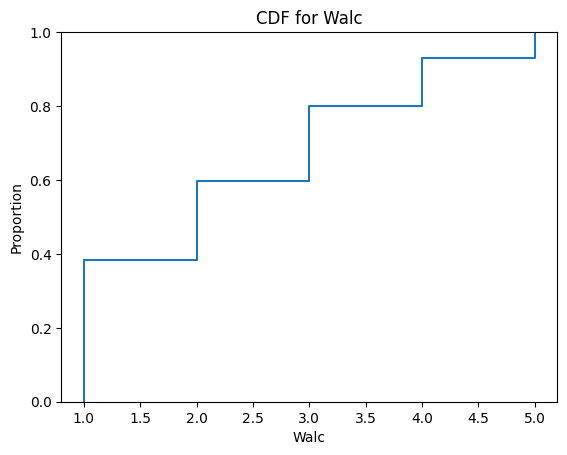

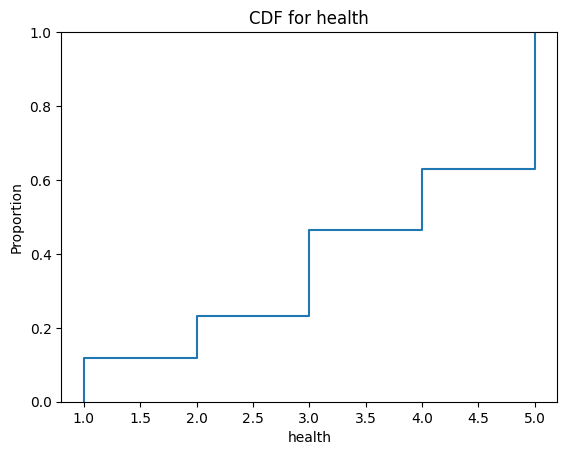

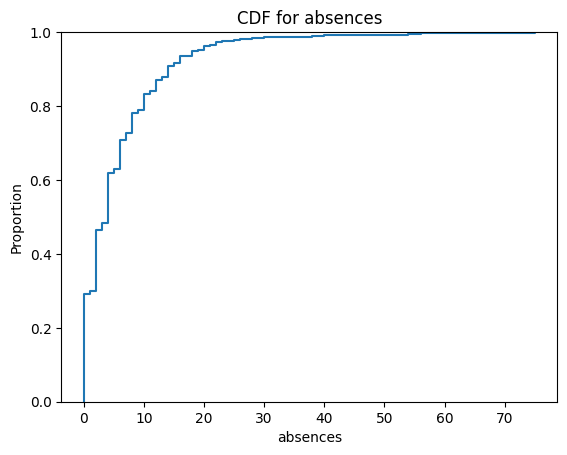

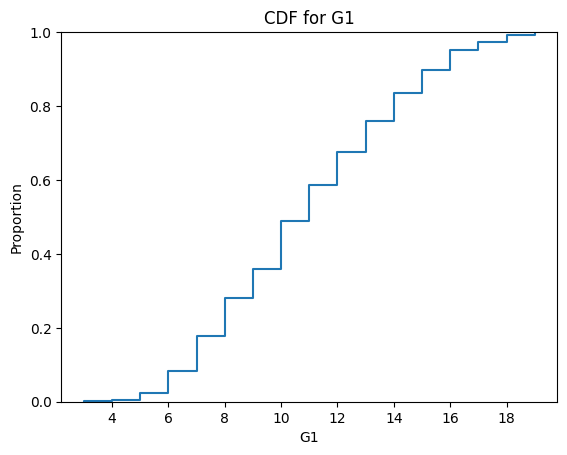

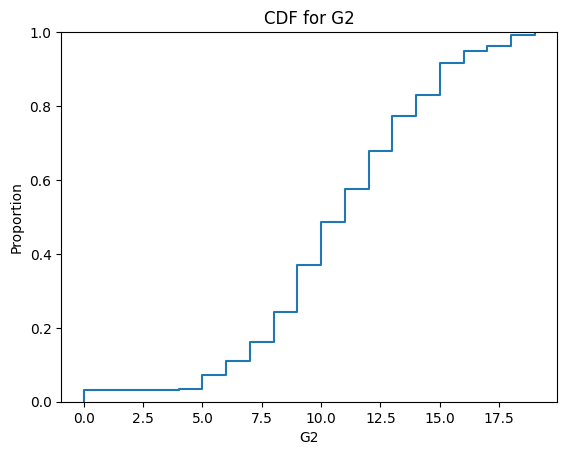

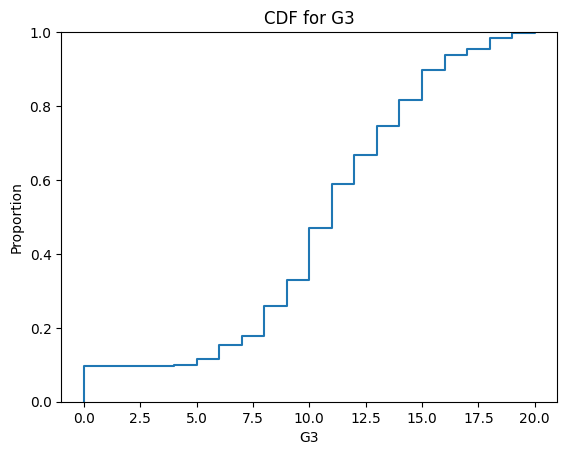

In [ ]:
# CDF
for column in numeric_columns.columns:
    sns.ecdfplot(numeric_columns[column])
    plt.title(f'CDF for {column}')
    plt.show()

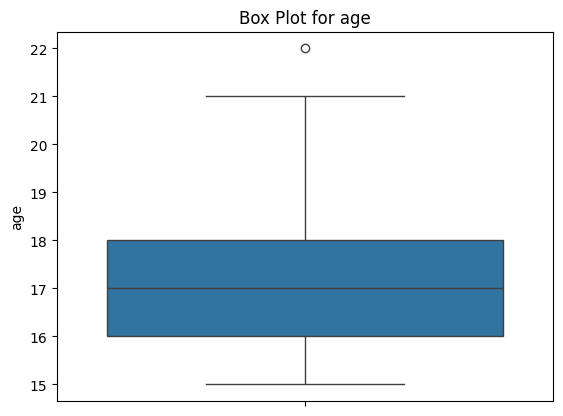

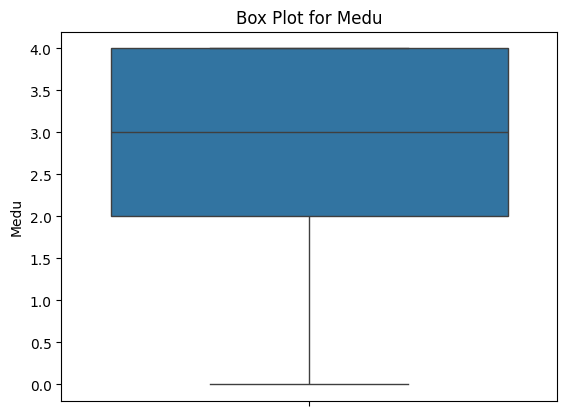

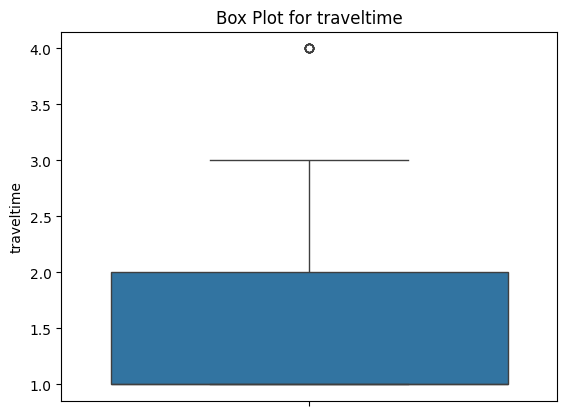

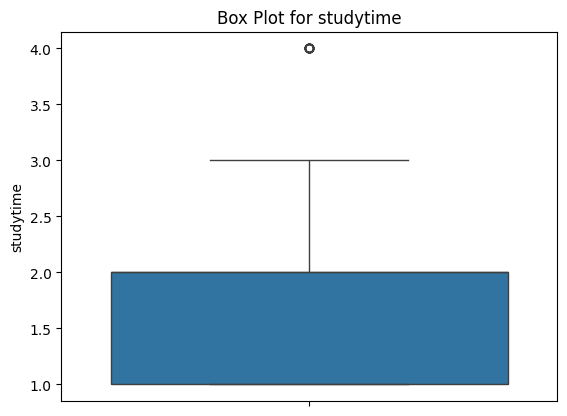

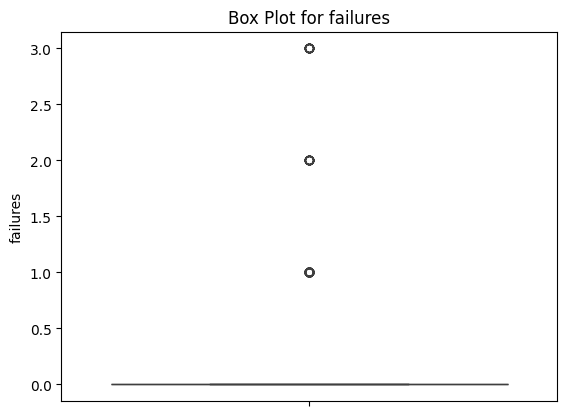

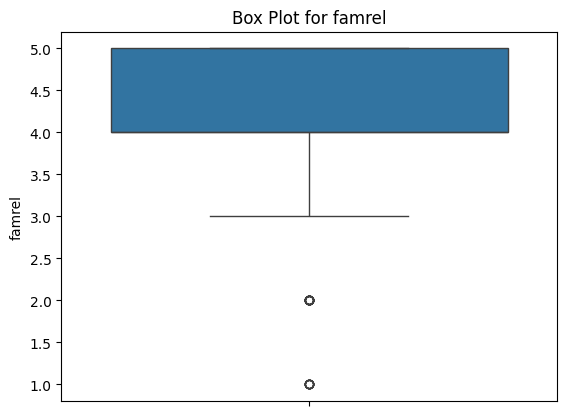

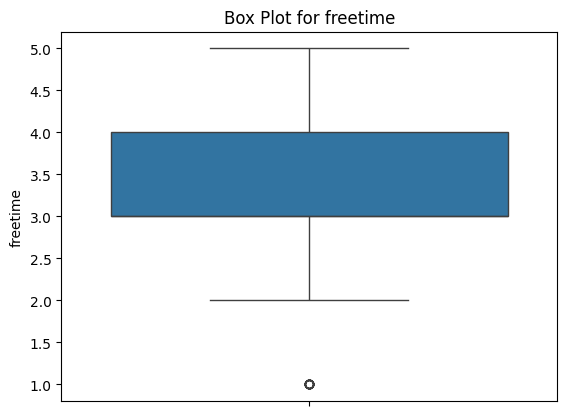

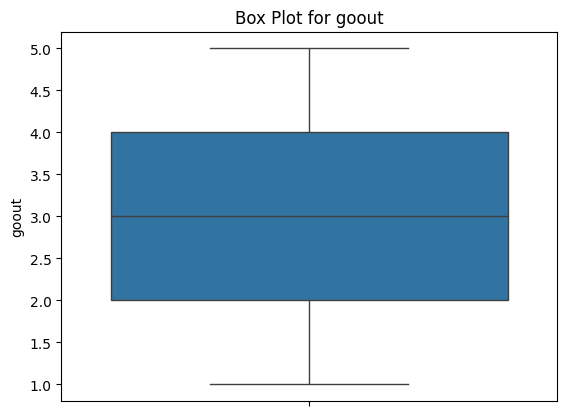

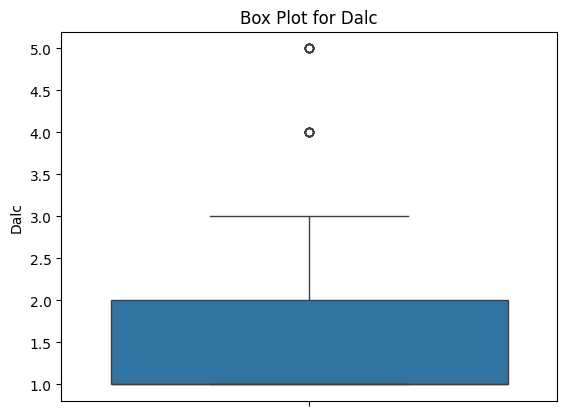

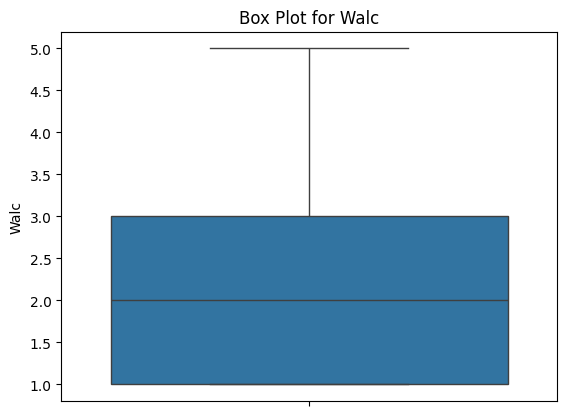

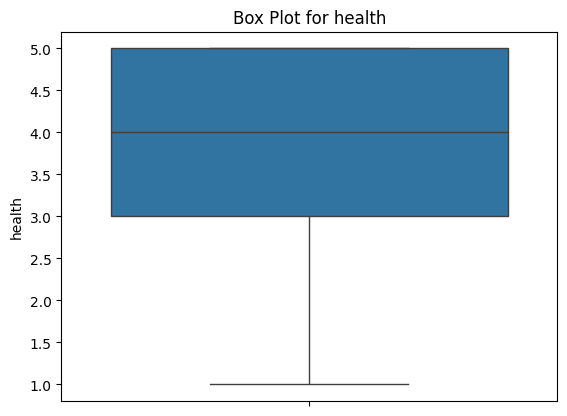

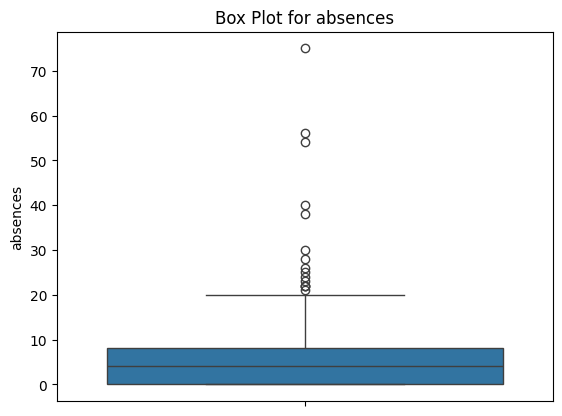

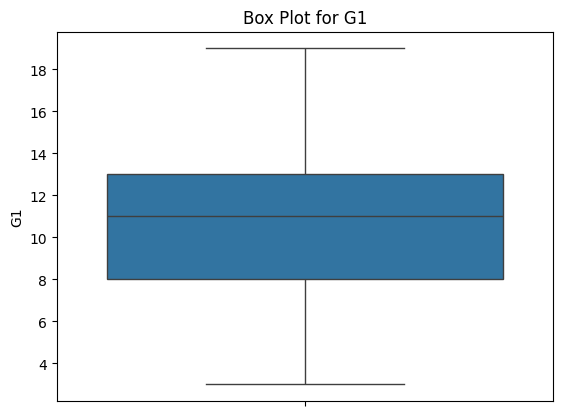

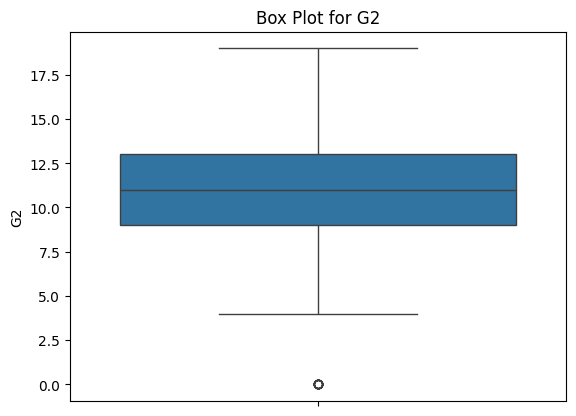

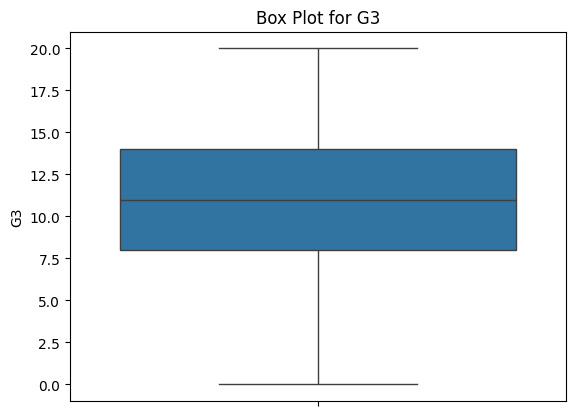

In [ ]:
# Box plots
for column in numeric_columns.columns:
    sns.boxplot(raw_data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
raw_data['school_enc'] = le.fit_transform(raw_data['school'])
raw_data['sex_enc'] = le.fit_transform(raw_data['sex'])
raw_data['Pstatus_enc'] = le.fit_transform(raw_data['Pstatus'])
raw_data['Mjob_enc'] = le.fit_transform(raw_data['Mjob'])
raw_data['Fjob_enc'] = le.fit_transform(raw_data['Fjob'])
raw_data['reason_enc'] = le.fit_transform(raw_data['reason'])
raw_data['guardian_enc'] = le.fit_transform(raw_data['guardian'])
raw_data['schoolsup_enc'] = le.fit_transform(raw_data['schoolsup'])
raw_data['famsup_enc'] = le.fit_transform(raw_data['famsup'])
raw_data['paid_enc'] = le.fit_transform(raw_data['paid'])
raw_data['activities_enc'] = le.fit_transform(raw_data['activities'])
raw_data['nursery_enc'] = le.fit_transform(raw_data['nursery'])
raw_data['higher_enc'] = le.fit_transform(raw_data['higher'])
raw_data['internet_enc'] = le.fit_transform(raw_data['internet'])
raw_data['romantic_enc'] = le.fit_transform(raw_data['romantic'])

In [ ]:
raw_data = raw_data.drop('school',axis=1)
raw_data = raw_data.drop('sex',axis=1)
raw_data = raw_data.drop('Pstatus',axis=1)
raw_data = raw_data.drop('Mjob',axis=1)
raw_data = raw_data.drop('Fjob',axis=1)
raw_data = raw_data.drop('reason',axis=1)
raw_data = raw_data.drop('guardian',axis=1)
raw_data = raw_data.drop('schoolsup',axis=1)
raw_data = raw_data.drop('famsup',axis=1)
raw_data = raw_data.drop('paid',axis=1)
raw_data = raw_data.drop('activities',axis=1)
raw_data = raw_data.drop('nursery',axis=1)
raw_data = raw_data.drop('higher',axis=1)
raw_data = raw_data.drop('internet',axis=1)
raw_data = raw_data.drop('romantic',axis=1)

In [ ]:
raw_data

age  Medu  traveltime  studytime  failures  famrel  freetime  goout  \
0     18     4           2          2         0       4         3      4   
1     17     1           1          2         0       5         3      3   
2     15     1           1          2         3       4         3      2   
3     15     4           1          3         0       3         2      2   
4     16     3           1          2         0       4         3      2   
..   ...   ...         ...        ...       ...     ...       ...    ...   
390   20     2           1          2         2       5         5      4   
391   17     3           2          1         0       2         4      5   
392   21     1           1          1         3       5         5      3   
393   18     3           3          1         0       4         4      1   
394   19     1           1          1         0       3         2      3   

     Dalc  Walc  ...  reason_enc  guardian_enc  schoolsup_enc  famsup_enc  \
0       1     1  ...           0             1              1           0   
1       1     1  ...           0             0              0           1   
2       2     3  ...           2             1              1           0   
3       1     1  ...           1             1              0           1   
4       1     2  ...           1             0              0           1   
..    ...   ...  ...         ...           ...            ...         ...   
390     4     5  ...           0             2              0           1   
391     3     4  ...           0             1              0           0   
392     3     3  ...           0             2              0           0   
393     3     4  ...           0             1              0           0   
394     3     3  ...           0             0              0           0   

     paid_enc  activities_enc  nursery_enc  higher_enc  internet_enc  \
0           0               0            1           1             0   
1           0               0            0           1             1   
2           1               0            1           1             1   
3           1               1            1           1             1   
4           1               0            1           1             0   
..        ...             ...          ...         ...           ...   
390         1               0            1           1             0   
391         0               0            0           1             1   
392         0               0            0           1             0   
393         0               0            0           1             1   
394         0               0            1           1             1   

     romantic_enc  
0               0  
1               0  
2               0  
3               1  
4               0  
..            ...  
390             0  
391             0  
392             0  
393             0  
394             0  

[395 rows x 30 columns]

In [ ]:
from scipy import stats
z_score_threshold = 3
z_scores = stats.zscore(raw_data)
outlier_indices = (z_scores > z_score_threshold).any(axis=1)
cleaned_data = raw_data[~outlier_indices]
cleaned_data

age  Medu  traveltime  studytime  failures  famrel  freetime  goout  \
0     18     4           2          2         0       4         3      4   
1     17     1           1          2         0       5         3      3   
3     15     4           1          3         0       3         2      2   
4     16     3           1          2         0       4         3      2   
5     16     4           1          2         0       5         4      2   
..   ...   ...         ...        ...       ...     ...       ...    ...   
389   18     1           2          2         1       1         1      1   
390   20     2           1          2         2       5         5      4   
391   17     3           2          1         0       2         4      5   
393   18     3           3          1         0       4         4      1   
394   19     1           1          1         0       3         2      3   

     Dalc  Walc  ...  reason_enc  guardian_enc  schoolsup_enc  famsup_enc  \
0       1     1  ...           0             1              1           0   
1       1     1  ...           0             0              0           1   
3       1     1  ...           1             1              0           1   
4       1     2  ...           1             0              0           1   
5       1     2  ...           3             1              0           1   
..    ...   ...  ...         ...           ...            ...         ...   
389     1     1  ...           0             1              0           0   
390     4     5  ...           0             2              0           1   
391     3     4  ...           0             1              0           0   
393     3     4  ...           0             1              0           0   
394     3     3  ...           0             0              0           0   

     paid_enc  activities_enc  nursery_enc  higher_enc  internet_enc  \
0           0               0            1           1             0   
1           0               0            0           1             1   
3           1               1            1           1             1   
4           1               0            1           1             0   
5           1               1            1           1             1   
..        ...             ...          ...         ...           ...   
389         0               1            1           1             0   
390         1               0            1           1             0   
391         0               0            0           1             1   
393         0               0            0           1             1   
394         0               0            1           1             1   

     romantic_enc  
0               0  
1               0  
3               1  
4               0  
5               0  
..            ...  
389             0  
390             0  
391             0  
393             0  
394             0  

[361 rows x 30 columns]

<Axes: >

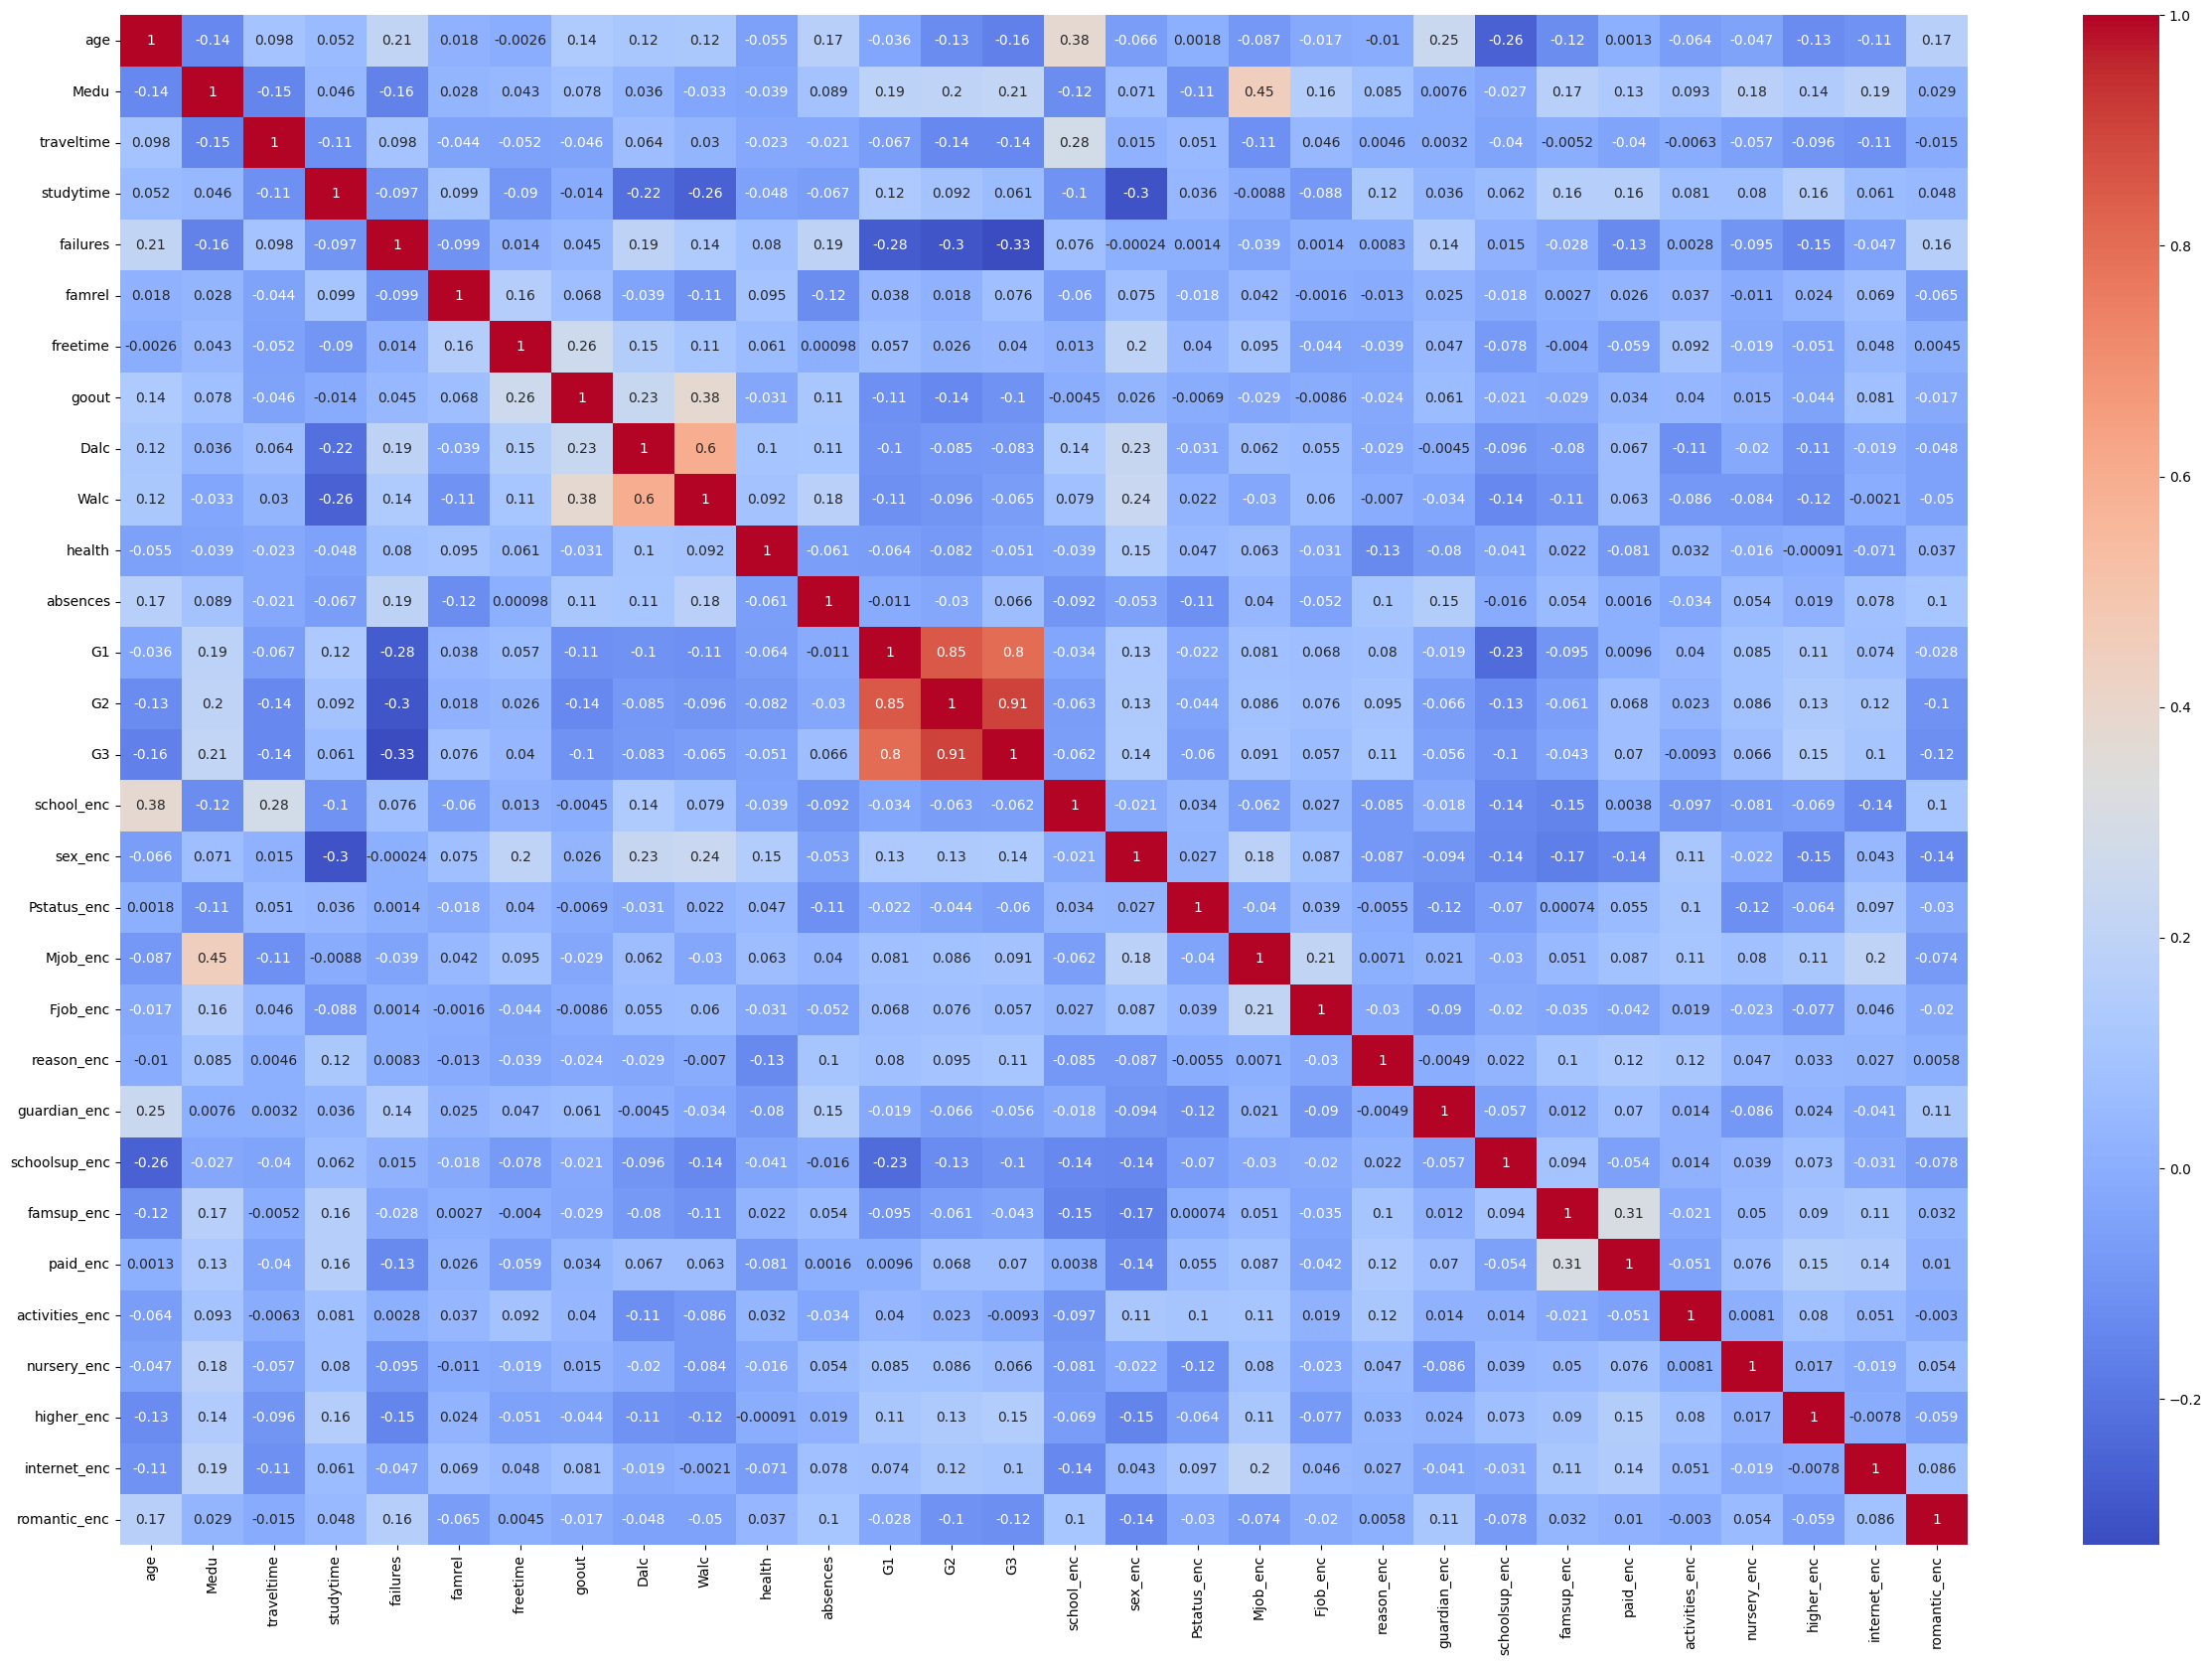

In [ ]:
x = cleaned_data.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(x,annot=True,cmap='coolwarm')

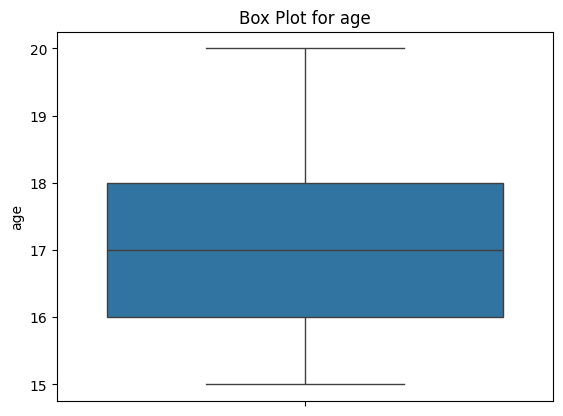

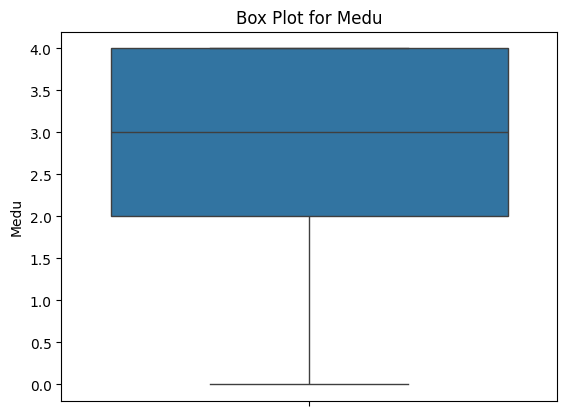

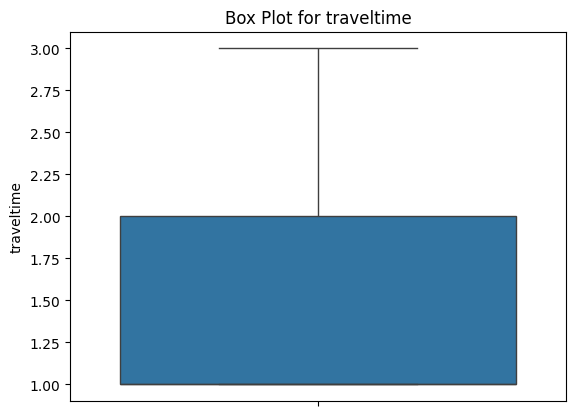

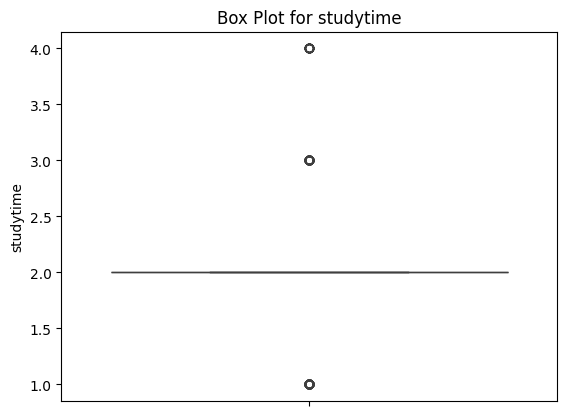

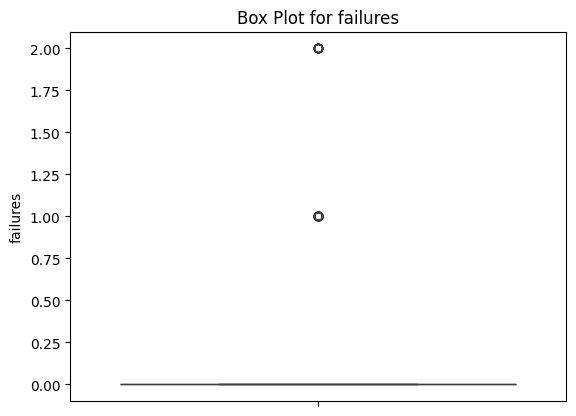

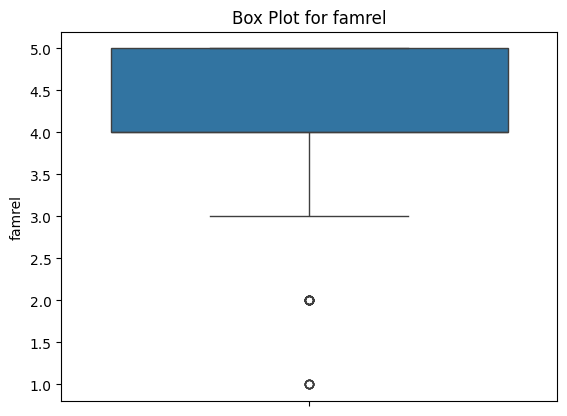

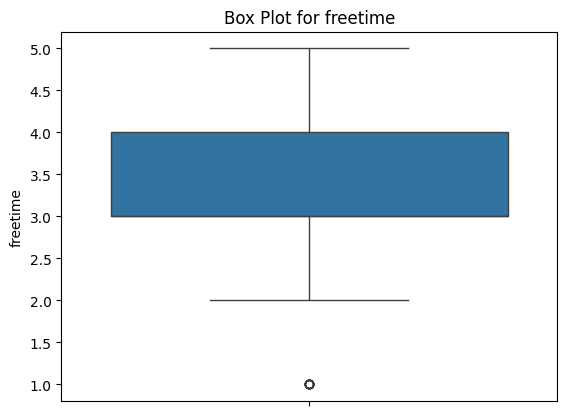

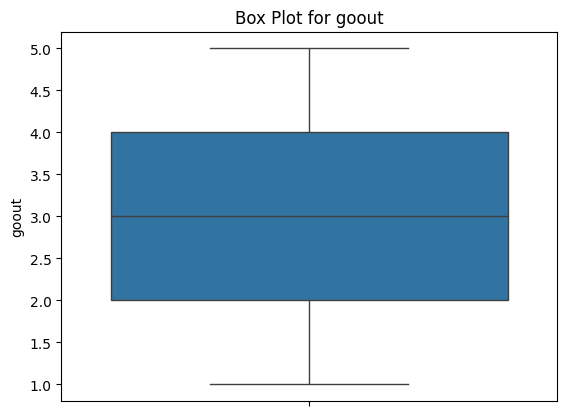

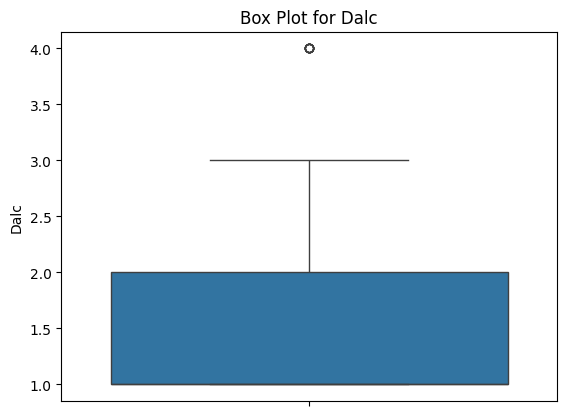

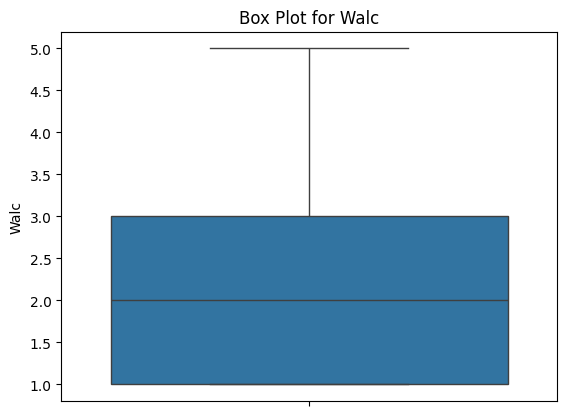

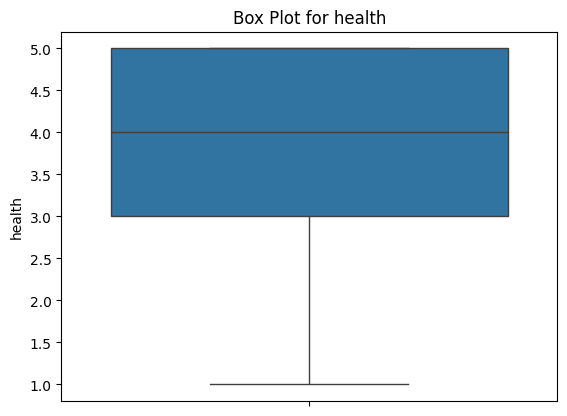

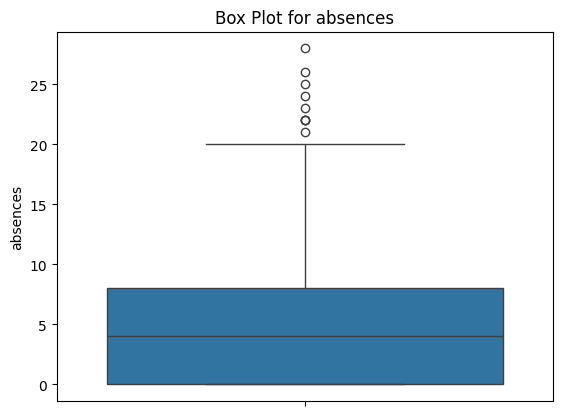

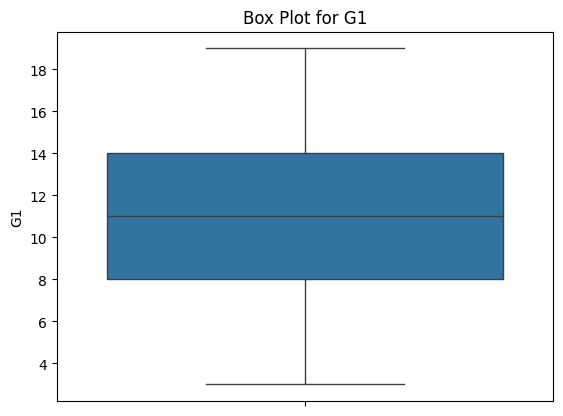

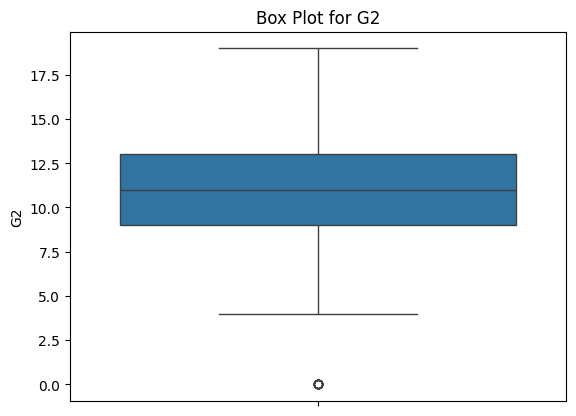

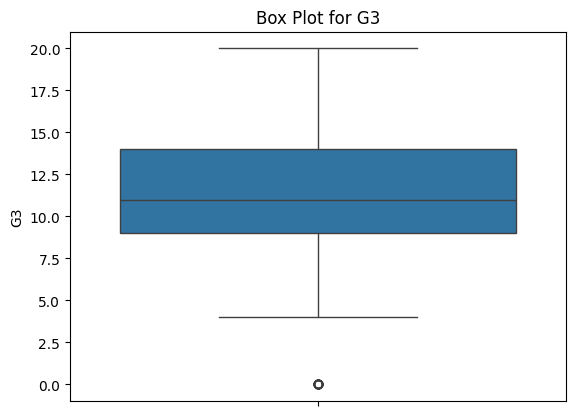

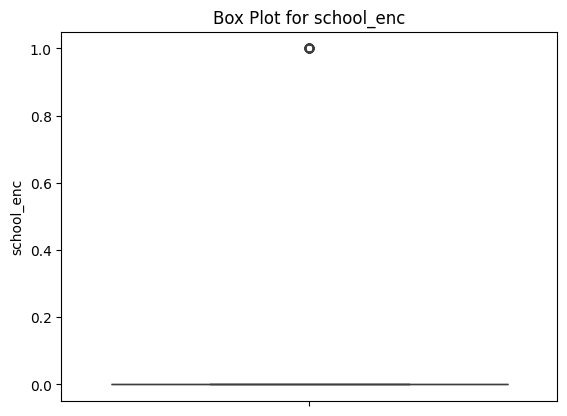

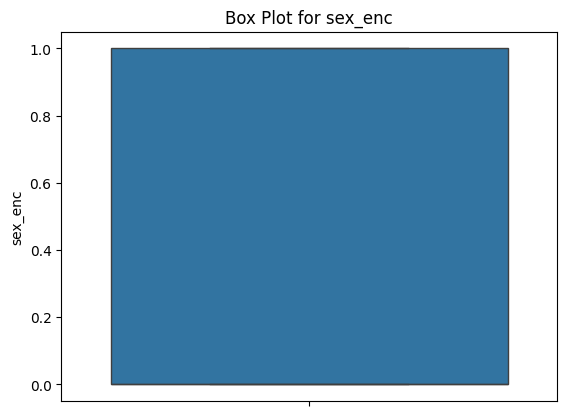

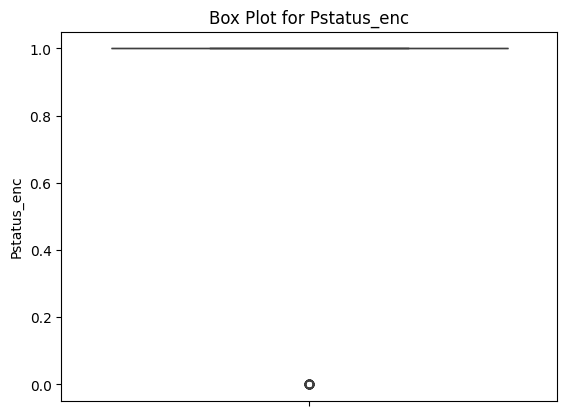

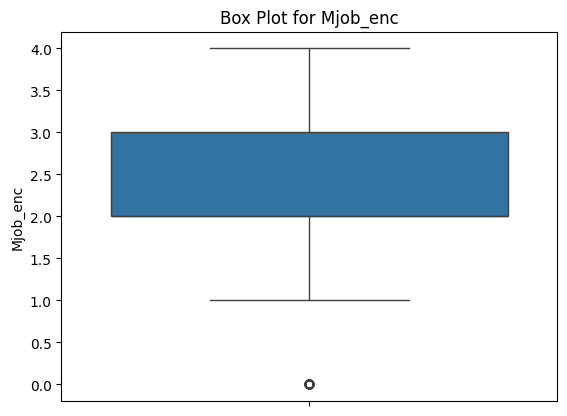

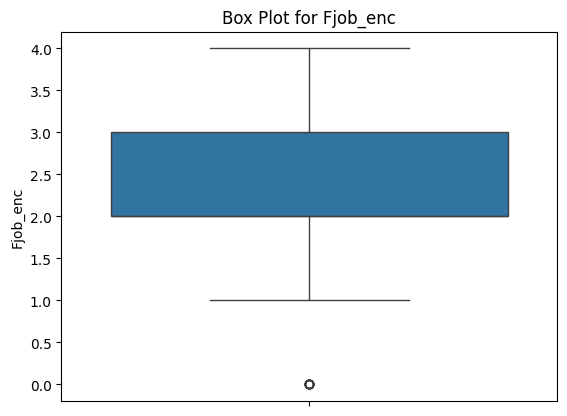

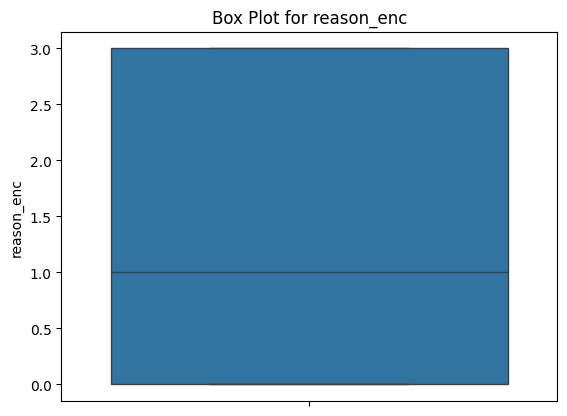

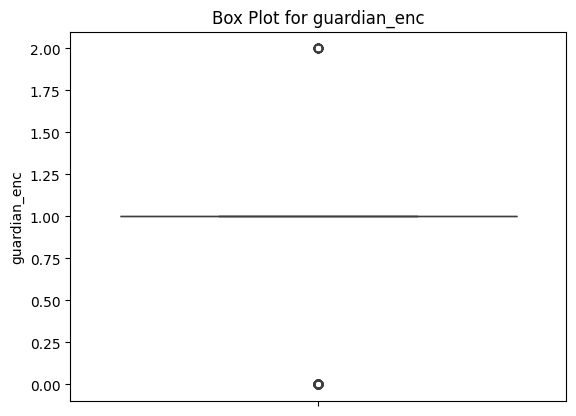

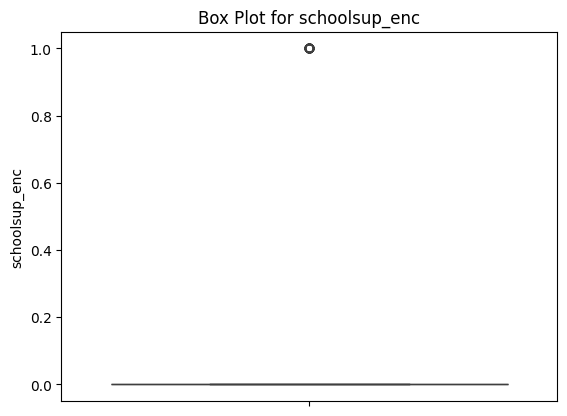

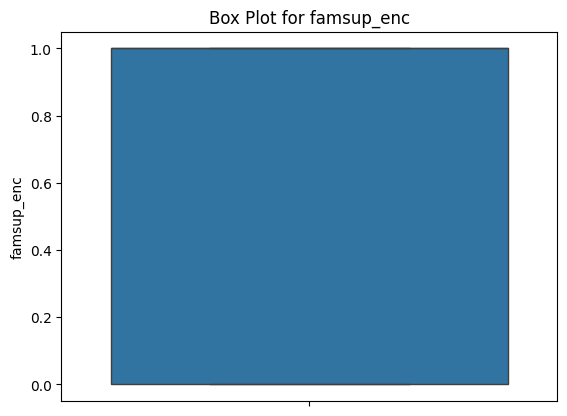

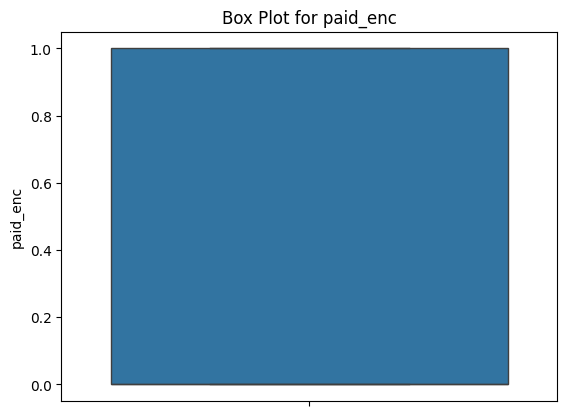

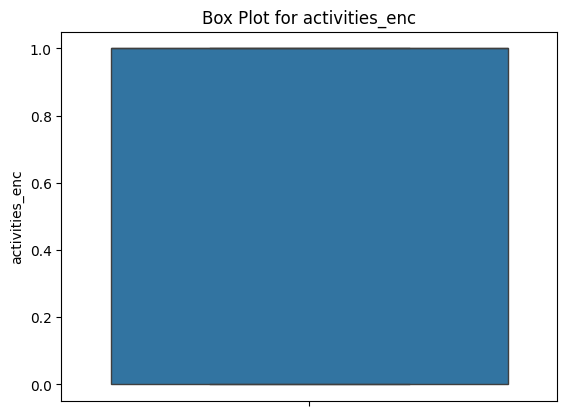

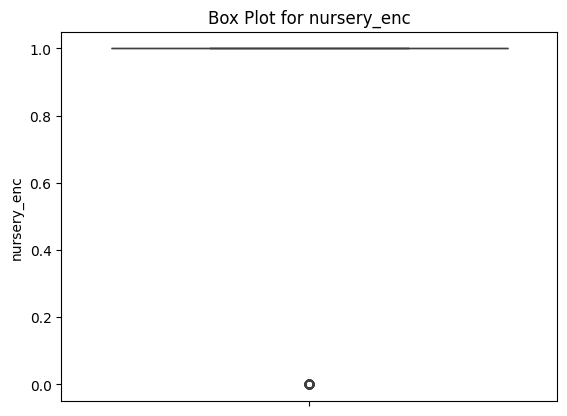

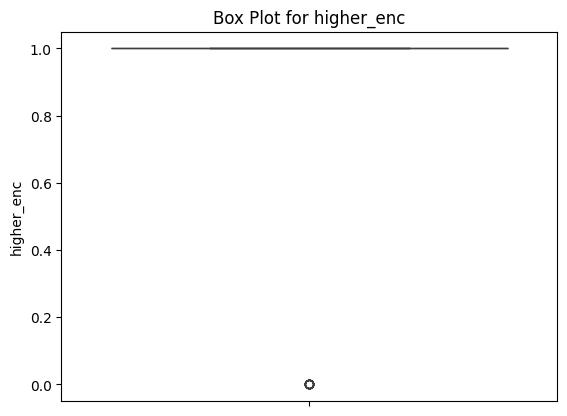

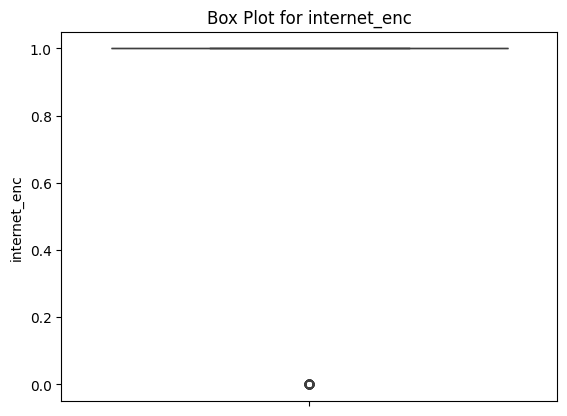

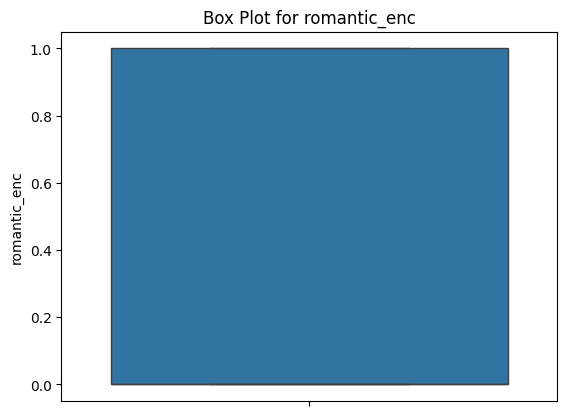

In [ ]:
# Box plots
for column in cleaned_data.columns:
    sns.boxplot(cleaned_data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [ ]:
cleaned_data.isnull().sum()

age               0
Medu              0
traveltime        0
studytime         0
failures          0
famrel            0
freetime          0
goout             0
Dalc              0
Walc              0
health            0
absences          0
G1                0
G2                0
G3                0
school_enc        0
sex_enc           0
Pstatus_enc       0
Mjob_enc          0
Fjob_enc          0
reason_enc        0
guardian_enc      0
schoolsup_enc     0
famsup_enc        0
paid_enc          0
activities_enc    0
nursery_enc       0
higher_enc        0
internet_enc      0
romantic_enc      0
dtype: int64

<Axes: >

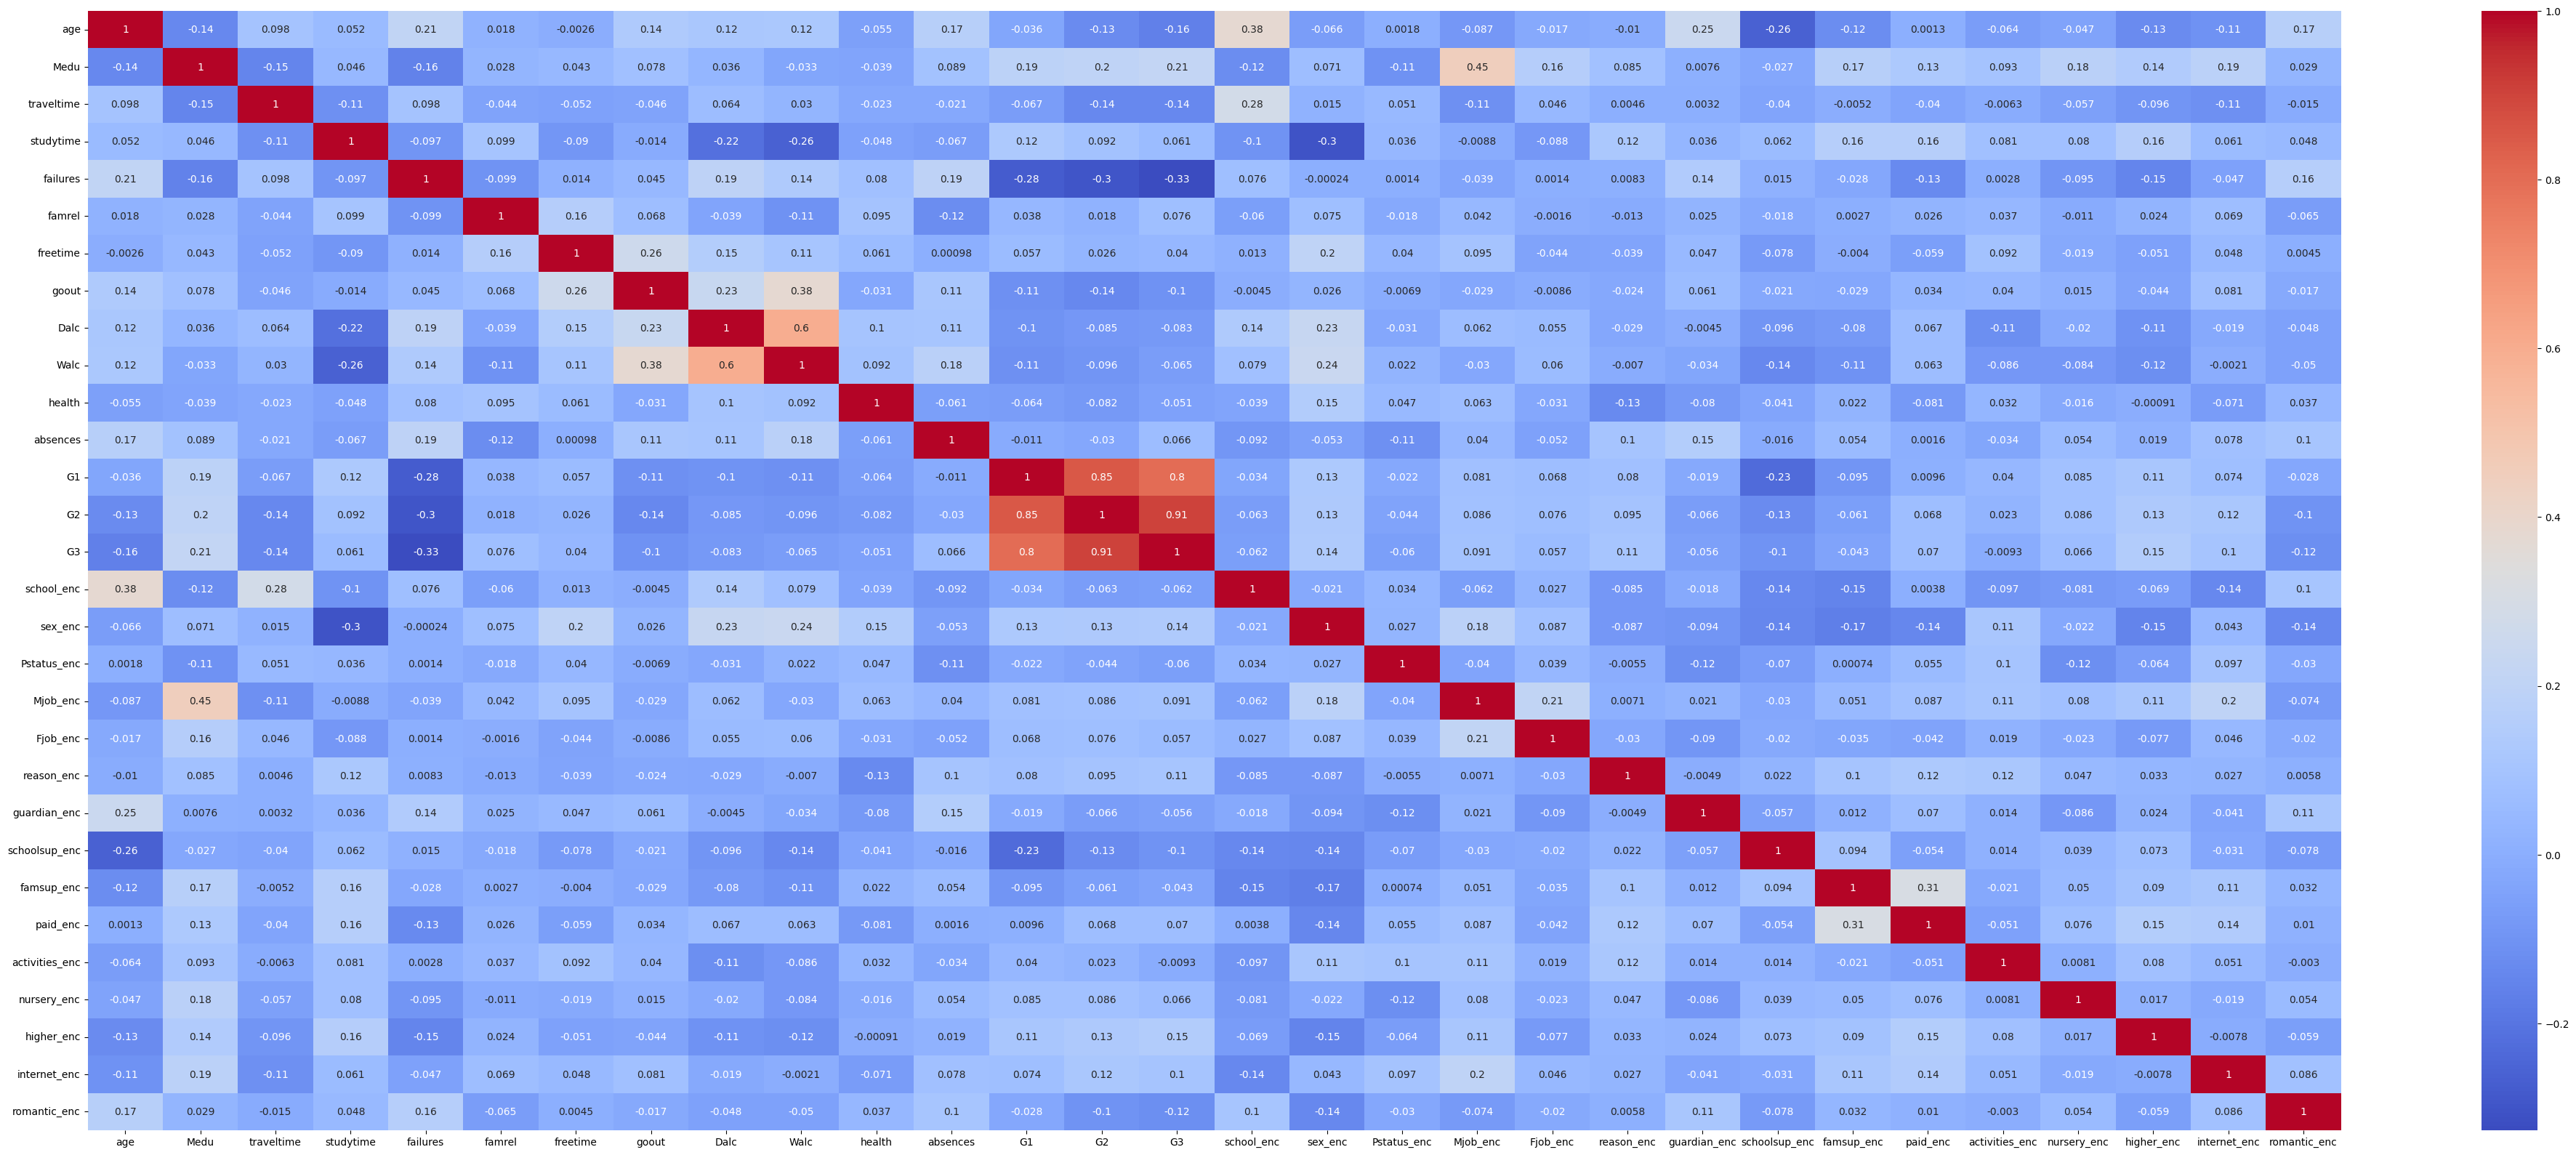

In [ ]:
x= cleaned_data.corr()
plt.figure(figsize=(50, 20))
sns.heatmap(x,annot=True,cmap='coolwarm')

In [ ]:
data1=cleaned_data.copy()

In [ ]:
data1 = data1.drop(['famrel','Dalc','Walc','school_enc','Pstatus_enc','Mjob_enc','Fjob_enc','guardian_enc','famsup_enc','paid_enc','activities_enc','nursery_enc'],axis=1)
data1

age  Medu  traveltime  studytime  failures  freetime  goout  health  \
0     18     4           2          2         0         3      4       3   
1     17     1           1          2         0         3      3       3   
3     15     4           1          3         0         2      2       5   
4     16     3           1          2         0         3      2       5   
5     16     4           1          2         0         4      2       5   
..   ...   ...         ...        ...       ...       ...    ...     ...   
389   18     1           2          2         1         1      1       5   
390   20     2           1          2         2         5      4       4   
391   17     3           2          1         0         4      5       2   
393   18     3           3          1         0         4      1       5   
394   19     1           1          1         0         2      3       5   

     absences  G1  G2  G3  sex_enc  reason_enc  schoolsup_enc  higher_enc  \
0           6   5   6   6        0           0              1           1   
1           4   5   5   6        0           0              0           1   
3           2  15  14  15        0           1              0           1   
4           4   6  10  10        0           1              0           1   
5          10  15  15  15        1           3              0           1   
..        ...  ..  ..  ..      ...         ...            ...         ...   
389         0   6   5   0        0           0              0           1   
390        11   9   9   9        1           0              0           1   
391         3  14  16  16        1           0              0           1   
393         0  11  12  10        1           0              0           1   
394         5   8   9   9        1           0              0           1   

     internet_enc  romantic_enc  
0               0             0  
1               1             0  
3               1             1  
4               0             0  
5               1             0  
..            ...           ...  
389             0             0  
390             0             0  
391             1             0  
393             1             0  
394             1             0  

[361 rows x 18 columns]

<Axes: >

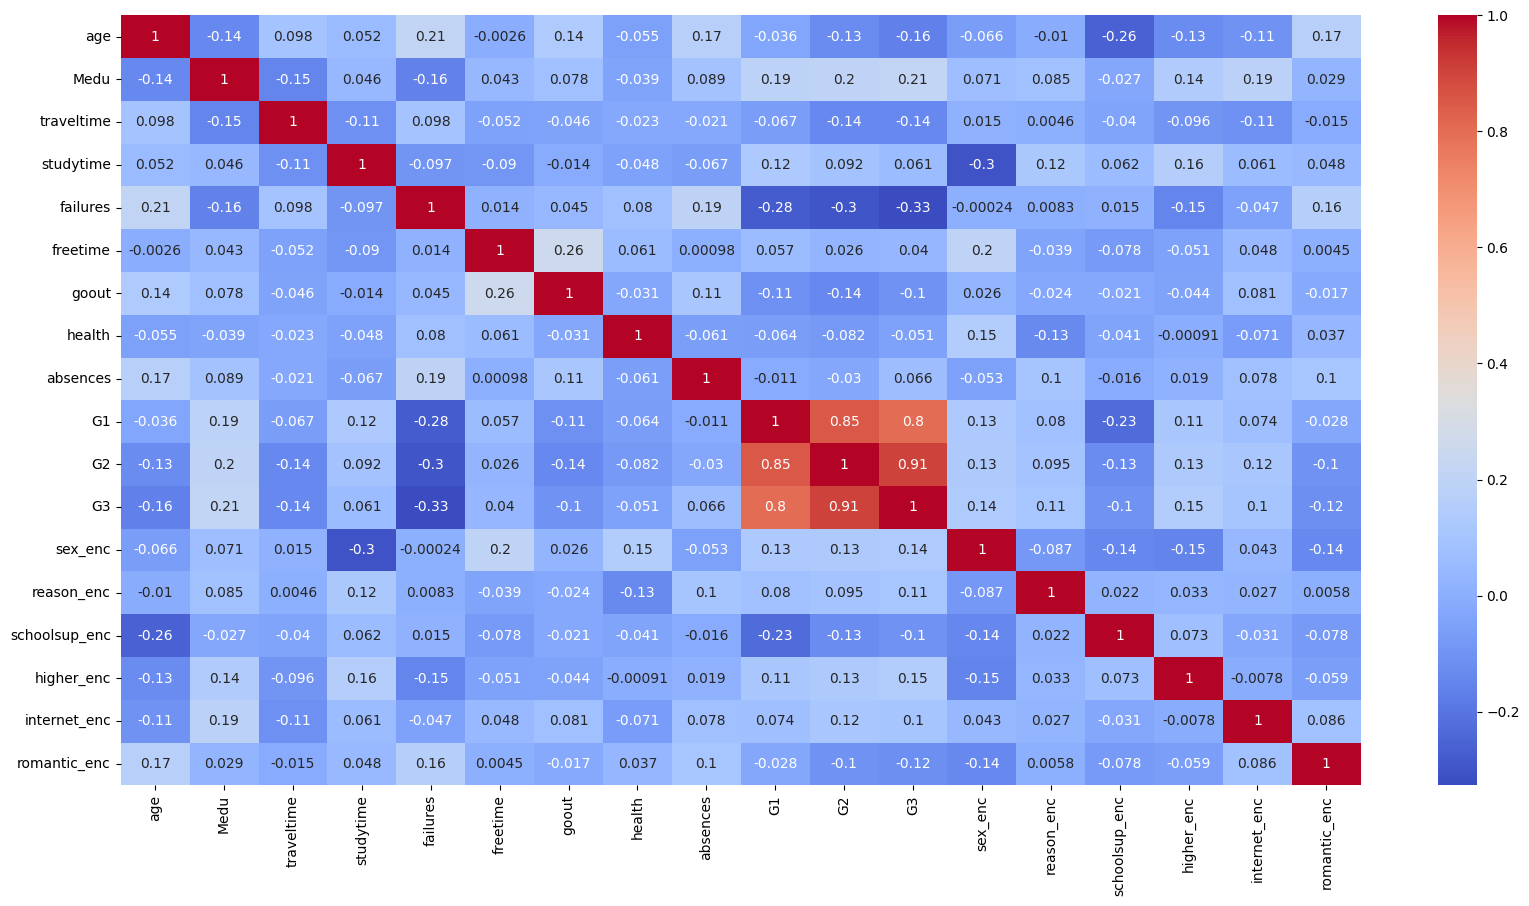

In [ ]:
x = data1.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(x,annot=True,cmap='coolwarm')

In [ ]:
data1 = data1.drop(['freetime','traveltime','schoolsup_enc','internet_enc'],axis=1)

In [ ]:
data1 = data1.drop(['romantic_enc','reason_enc'],axis=1)
data1

age  Medu  studytime  failures  goout  health  absences  G1  G2  G3  \
0     18     4          2         0      4       3         6   5   6   6   
1     17     1          2         0      3       3         4   5   5   6   
3     15     4          3         0      2       5         2  15  14  15   
4     16     3          2         0      2       5         4   6  10  10   
5     16     4          2         0      2       5        10  15  15  15   
..   ...   ...        ...       ...    ...     ...       ...  ..  ..  ..   
389   18     1          2         1      1       5         0   6   5   0   
390   20     2          2         2      4       4        11   9   9   9   
391   17     3          1         0      5       2         3  14  16  16   
393   18     3          1         0      1       5         0  11  12  10   
394   19     1          1         0      3       5         5   8   9   9   

     sex_enc  higher_enc  
0          0           1  
1          0           1  
3          0           1  
4          0           1  
5          1           1  
..       ...         ...  
389        0           1  
390        1           1  
391        1           1  
393        1           1  
394        1           1  

[361 rows x 12 columns]

<Axes: >

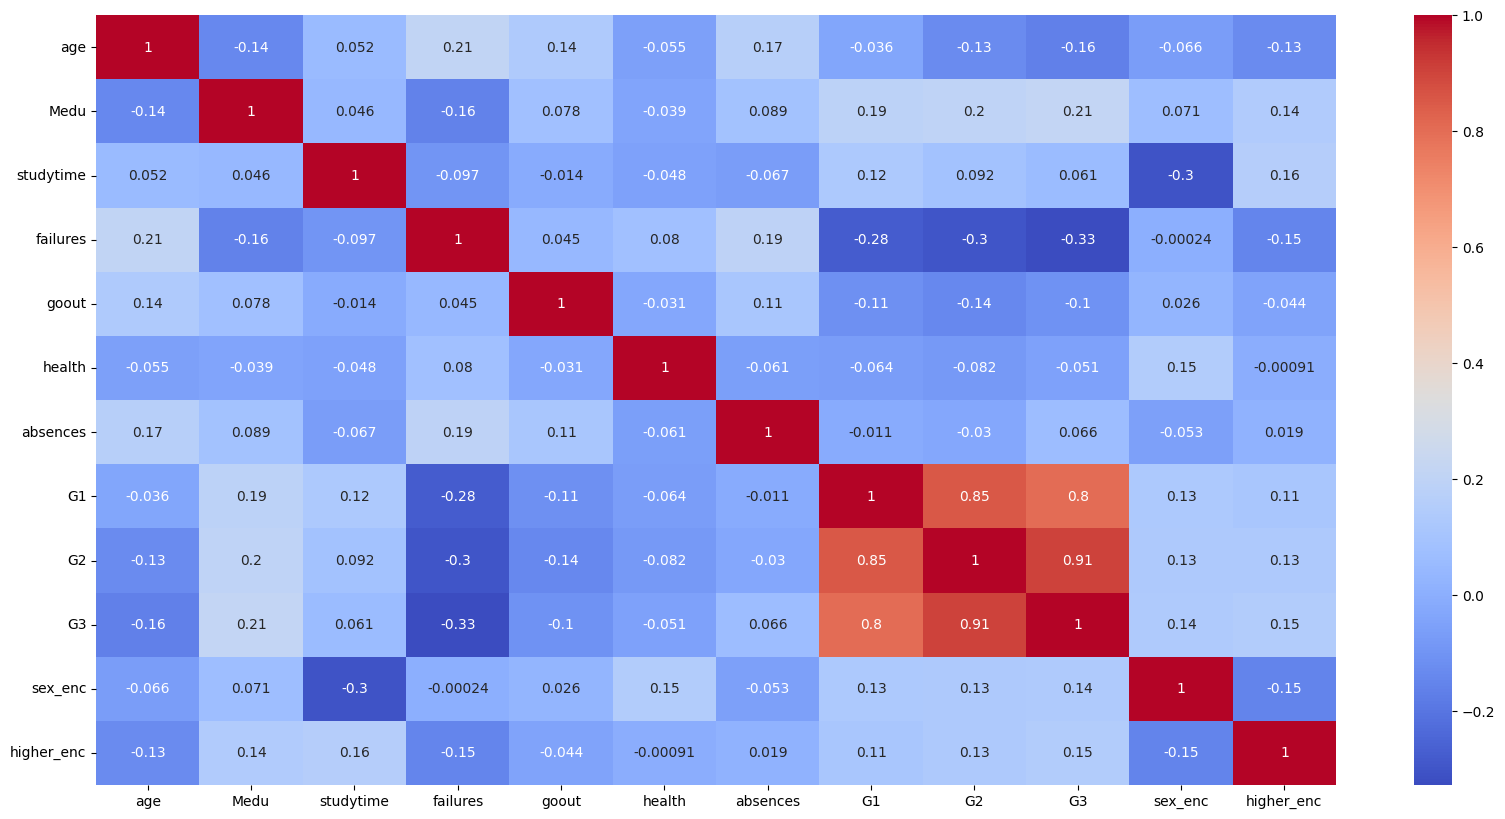

In [ ]:
x = data1.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(x,annot=True,cmap='coolwarm')

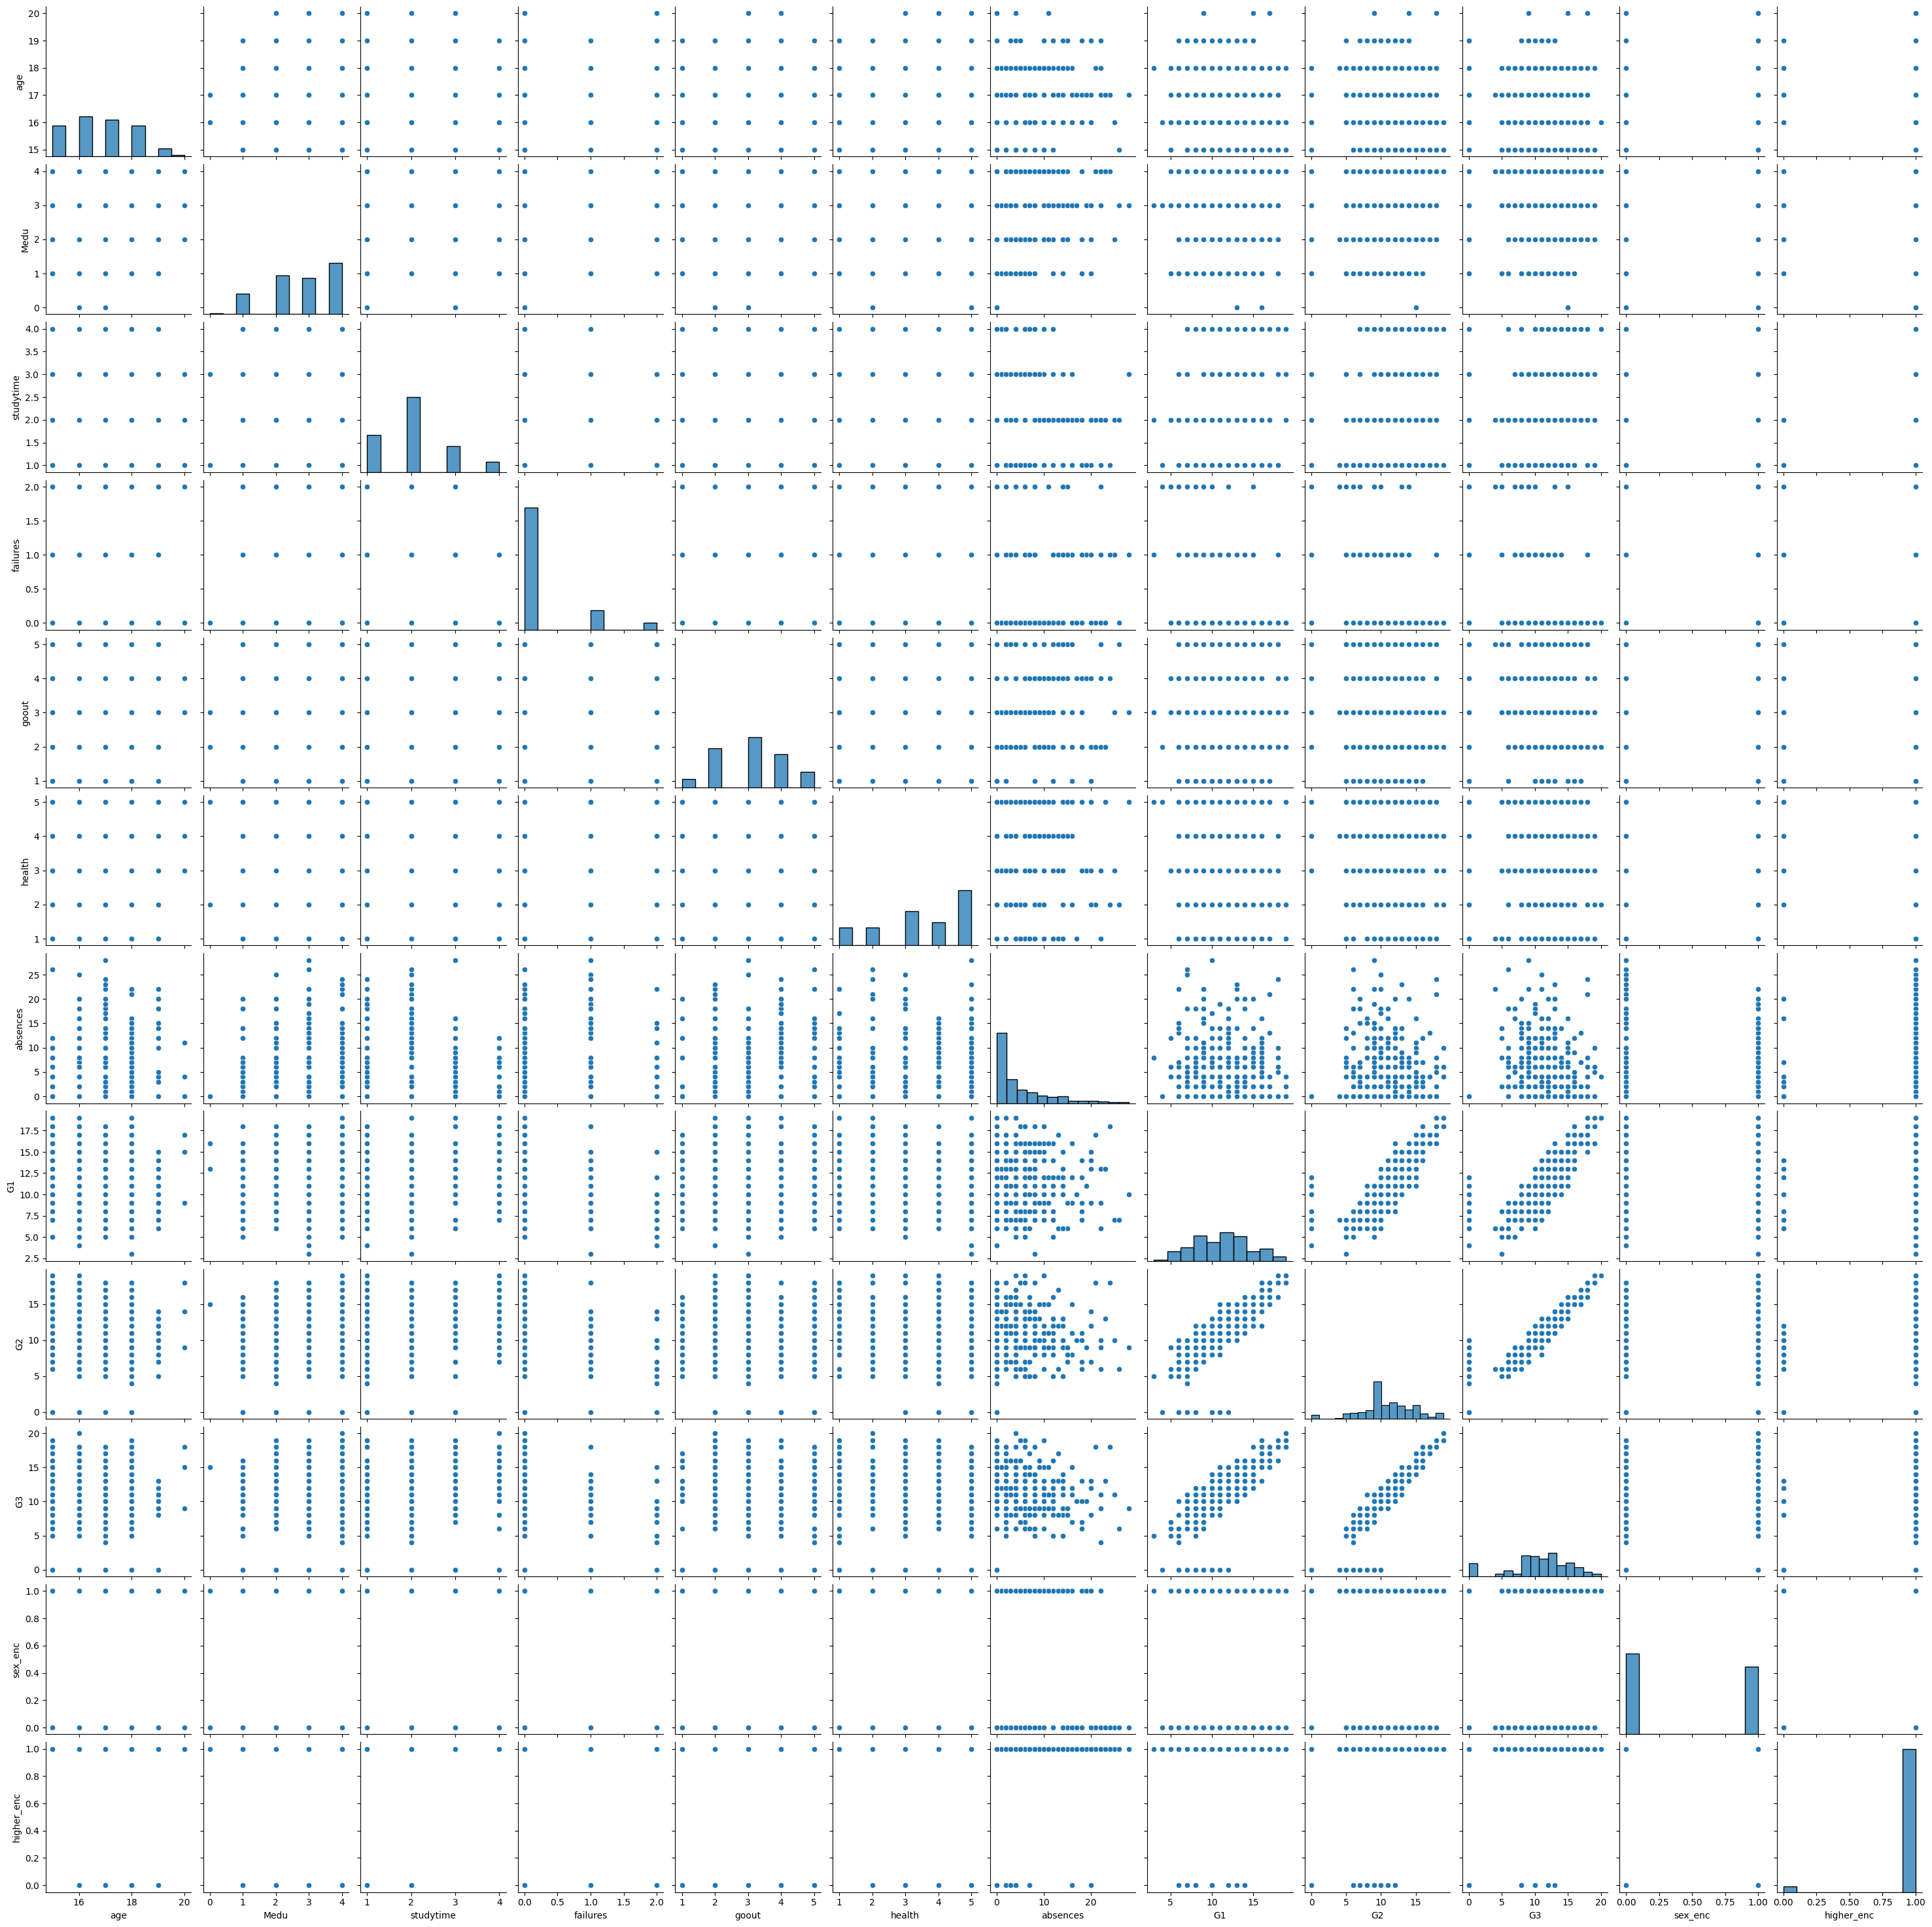

In [ ]:
# sns.pairplot(data1)
# plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
X = data1.drop(["G3"], axis = 1)
y = data1["G3"]

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_test,y_test)

0.8909373275296928

In [ ]:
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf', C=20,epsilon=0.19,gamma=0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
# from skl2onnx import to_onnx

# onx = to_onnx(svm_model, X[:])
# with open("svm_model.onnx", "wb") as f:
#     f.write(onx.SerializeToString())

AttributeError: 'SVR' object has no attribute 'dual_coef_'

In [ ]:
from sklearn.svm import SVR
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Create an SVR model with RBF kernel
your_scikit_model = SVR(kernel='rbf')  # Specify 'rbf' for the RBF kernel

# Features and target variable
feature_names = ["age", "Medu", "studytime", "failures", "goout", "health", "absences", "G1", "G2", "sex_enc", "higher_enc"]

# Convert your scikit-learn model to ONNX
input_type = [('float_input', FloatTensorType([None, len(feature_names)]))]
onnx_model = convert_sklearn(your_scikit_model, initial_types=input_type)

# Save the ONNX model to a file (SPPA_1.onnx)
onnx_file_path = "SPPA_1.onnx"
with open(onnx_file_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"ONNX model saved to {onnx_file_path}")

AttributeError: 'SVR' object has no attribute 'dual_coef_'

In [ ]:
# svm_model.score(X_test,y_test)

0.9412342979498317

In [ ]:
# mse = mean_squared_error(y_test, y_pred)
# mse

1.0874599906011087

In [ ]:
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, y_pred)
# r2

0.9412342979498317

In [ ]:
# num_predictors = X_train.shape[1]

# num_data_points = len(X_test)

# adjusted_r2 = 1 - (1 - r2) * (num_data_points - 1) / (num_data_points - num_predictors - 1)
# adjusted_r2

0.9330517318415804

In [ ]:
# from sklearn.model_selection import learning_curve
# train_sizes, train_scores, test_scores = learning_curve(reg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

In [ ]:
# train_mean = -np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = -np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
# plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red', marker='o')
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
# plt.title('Learning Curve for Linear Regression')
# plt.xlabel('Number of Training Examples')
# plt.ylabel('Negative Mean Squared Error')
# plt.legend(loc='best')
# plt.show()

In [ ]:
!python -m onnxruntime.tools.convert_onnx_models_to_ort svm_model.onnx

Converting models with optimization style 'Fixed' and level 'all'
Converting optimized ONNX model /content/svm_model.onnx to ORT format model /content/svm_model.ort
Error converting /content/svm_model.onnx: [ONNXRuntimeError] : 10 : INVALID_GRAPH : Load model from /content/svm_model.onnx failed:This is an invalid model. In Node, ("Cast", Cast, "", -1) : ("age": tensor(int64),"Medu": tensor(int64),"studytime": tensor(int64),"failures": tensor(int64),"goout": tensor(int64),"health": tensor(int64),"absences": tensor(int64),"G1": tensor(int64),"G2": tensor(int64),"sex_enc": tensor(int64),"higher_enc": tensor(int64),) -> ("cast_input",) , Error Node (Cast) has input size 11 not in range [min=1, max=1].
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/on